<a href="https://colab.research.google.com/github/d0bando/Personal-Projects/blob/octubre%2F2021/2021/Box_Office_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **TASK: WE WANT TO PREDICT THE BOX OFFICE INCOME FOR A CERTAIN MOVIE**

 [BOX OFFICE REVENUE COMPETITION FROM KAGGLE](https://www.kaggle.com/c/tmdb-box-office-prediction) 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORT FILES FROM DRIVE INTO GOOGLE-COLAB:

# STEP-1: Code to read csv file into colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# STEP-3: Get File from Drive using file-ID
downloaded1 = drive.CreateFile({'id':'15m9lha0SNk48aJHgbM9yyYbvvaQvWZZJ'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('train.csv') 
downloaded2 = drive.CreateFile({'id':'1uNZI-s98s9SaI-m6lOvD1_8j9mhi6Aq5'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('test.csv') 

# STEP-4: Read File
train = pd.read_csv('train.csv',index_col="id") 
test = pd.read_csv('test.csv',index_col="id")

#Repeat STEPs 3 & 4 to load as many files as you require.

# **SUMMARY**

In [2]:
print(f"Train have {train.shape[0]} rows and {train.shape[1]} columns")
train.head()

Train have 3000 rows and 22 columns


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
print(f"Test have {test.shape[0]} rows and {test.shape[1]} columns")
test.head()

Test have 4398 rows and 21 columns


,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,,,,
3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   2844 non-null   object 
 11  production_countries   2945 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       2980 non-null   object 
 15  stat

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 3001 to 7398
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  877 non-null    object 
 1   budget                 4398 non-null   int64  
 2   genres                 4382 non-null   object 
 3   homepage               1420 non-null   object 
 4   imdb_id                4398 non-null   object 
 5   original_language      4398 non-null   object 
 6   original_title         4398 non-null   object 
 7   overview               4384 non-null   object 
 8   popularity             4398 non-null   float64
 9   poster_path            4397 non-null   object 
 10  production_companies   4140 non-null   object 
 11  production_countries   4296 non-null   object 
 12  release_date           4397 non-null   object 
 13  runtime                4394 non-null   float64
 14  spoken_languages       4356 non-null   object 
 15  s

In [6]:
train.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


In [7]:
test.describe()

,budget,popularity,runtime
count,4.398000e+03,4398.000000,4394.000000
mean,2.264929e+07,8.550230,107.622212
std,3.689991e+07,12.209014,21.058290
min,0.000000e+00,0.000001,0.000000
25%,0.000000e+00,3.895186,94.000000
50%,7.450000e+06,7.482241,104.000000
75%,2.800000e+07,10.938524,118.000000
max,2.600000e+08,547.488298,320.000000


In [8]:
train.describe(include="object")

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,604,2993,946,3000,3000,3000,2992,2999,2844,2945,3000,2980,3000,2403,3000,2724,2987,2984
unique,422,872,941,3000,36,2975,2992,2999,2383,321,2398,401,2,2400,2969,2648,2975,2984
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0099582,en,Lolita,"When it was first released in Argentina, Pablo...",/qNeGtQaatgMGrS60xZ0yMOVblVJ.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Priest,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe43c1c3a36847f806d331', 'de..."
freq,16,266,4,1,2575,2,1,1,51,1752,5,1817,2996,3,2,27,13,1


In [9]:
test.describe(include="object")

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
count,877,4382,1420,4398,4398,4398,4384,4397,4140,4296,4397,4356,4396,3535,4395,4005,4385,4376
unique,556,1101,1402,4398,39,4353,4383,4397,3366,458,3289,526,3,3529,4342,3885,4365,4376
top,"[{'id': 645, 'name': 'James Bond Collection', ...","[{'id': 18, 'name': 'Drama'}]",http://www.kungfupanda.com/,tt0079891,en,Psycho,No overview found.,/623vQwwIP1kferqMEL00Q2p5KYg.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/9/11,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What could go wrong?,Teenage Mutant Ninja Turtles,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '5609db0fc3a3686814000b57', 'de..."
freq,10,348,3,1,3776,2,2,1,72,2587,7,2704,4389,2,2,30,21,1


column datatypes

In [10]:
train.drop("revenue",axis=1).dtypes.sort_values()

budget                     int64
runtime                  float64
popularity               float64
belongs_to_collection     object
Keywords                  object
title                     object
tagline                   object
status                    object
spoken_languages          object
release_date              object
production_countries      object
production_companies      object
poster_path               object
overview                  object
original_title            object
original_language         object
imdb_id                   object
homepage                  object
genres                    object
cast                      object
crew                      object
dtype: object

In [11]:
num_cols=train.select_dtypes(exclude=np.object).drop("revenue",axis=1).columns.tolist()
obj_cols=train.select_dtypes(include=np.object).columns.tolist()
print("Numerical Columns:", num_cols)
print("\n")
print("Object Columns:", obj_cols)

Numerical Columns: ['budget', 'popularity', 'runtime']


Object Columns: ['belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']


# **EXPLORATORY DATA ANALYSIS AND MISSING VALUES**

## TARGET VARIABLE

In [12]:
target = ["revenue"]
y=train.revenue
y

id
1        12314651
2        95149435
3        13092000
4        16000000
5         3923970
          ...    
2996      1596687
2997       180590
2998     89456761
2999    171963386
3000     82087155
Name: revenue, Length: 3000, dtype: int64

In [13]:
y.sort_values()

id
348              1
1755             1
1918             1
1875             1
696              2
           ...    
2323    1123746996
685     1262886337
2771    1405403694
1762    1506249360
1127    1519557910
Name: revenue, Length: 3000, dtype: int64

## NUMERICAL COLUMNS

we can see that only "runtime" have 2 missing values

In [14]:
train[num_cols].isna().sum()

budget        0
popularity    0
runtime       2
dtype: int64

 but runtime and budget have 0 values, popularity seems to be good

In [15]:
train[num_cols].describe()

,budget,popularity,runtime
count,3.000000e+03,3000.000000,2998.000000
mean,2.253133e+07,8.463274,107.856571
std,3.702609e+07,12.104000,22.086434
min,0.000000e+00,0.000001,0.000000
25%,0.000000e+00,4.018053,94.000000
50%,8.000000e+06,7.374861,104.000000
75%,2.900000e+07,10.890983,118.000000
max,3.800000e+08,294.337037,338.000000


replacing 0 with NaN we have many missing values in budget

In [16]:
num_cols_process=train[num_cols].replace(0,np.nan)
num_cols_process

,budget,popularity,runtime
id,,,
1,14000000.0,6.575393,93.0
2,40000000.0,8.248895,113.0
3,3300000.0,64.299990,105.0
4,1200000.0,3.174936,122.0
5,NaN,1.148070,118.0
...,...,...,...
2996,NaN,9.853270,102.0
2997,NaN,3.727996,102.0
2998,65000000.0,14.482345,120.0


In [17]:
num_cols_process.isna().sum()

budget        812
popularity      0
runtime        14
dtype: int64

resume the process for test

In [18]:
def Num_process(df):
  df=df.copy()
  df[num_cols]=df[num_cols].replace(0,np.nan)
  return df[num_cols]
Num_process(test)

,budget,popularity,runtime
id,,,
3001,NaN,3.851534,90.0
3002,88000.0,3.559789,65.0
3003,NaN,8.085194,100.0
3004,6800000.0,8.596012,130.0
3005,2000000.0,3.217680,92.0
...,...,...,...
7394,42000000.0,9.970359,118.0
7395,19000000.0,6.046516,95.0
7396,16000000.0,9.596883,129.0


## OBJECT COLUMNS

#### SELECTING COLUMNS

**because there're not so many columns, we can analyze one by  one:**


---


DICTIONARY columns: 

"belongs_to_collection", "genres", "production_companies","production_countries", "spoken_languages", "Keywords","cast", "crew".

CATEGORICAL columns:

"homepage", "original_language", "release_date"

NLP columns:

 "original_title", "overview", "tagline", "title"

DROP columns:

 "imdb_id", "poster_path", "status"

In [19]:
train[obj_cols].head(2)

,belongs_to_collection,genres,homepage,imdb_id,original_language,original_title,overview,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,Keywords,cast,crew
id,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
2,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."


In [20]:
dict_cols = ["belongs_to_collection","genres","production_companies","production_countries","spoken_languages","Keywords","cast","crew"]
cat_cols = ["homepage", "original_language", "release_date"]
nlp_cols = ["original_title","overview","tagline","title"]
drop_cols = ["imdb_id","poster_path","status"]

In [21]:
train[drop_cols].head()

,imdb_id,poster_path,status
id,,,
1,tt2637294,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,Released
2,tt0368933,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,Released
3,tt2582802,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,Released
4,tt1821480,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,Released
5,tt1380152,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,Released


### NLP COLUMNS

"original title" and "title" are almost the same, perhaps adding an indicator when they differ is informative

In [22]:
train[nlp_cols].head()

,original_title,overview,tagline,title
id,,,,
1,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2
2,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement
3,Whiplash,"Under the direction of a ruthless instructor, ...",The road to greatness can take you to the edge.,Whiplash
4,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,NaN,Kahaani
5,마린보이,Marine Boy is the story of a former national s...,NaN,Marine Boy


maybe its usefull to add a missing indicator for tagline

In [23]:
train[nlp_cols].isna().sum()

original_title      0
overview            8
tagline           597
title               0
dtype: int64

#### Processing "title" and "original_title"

In [24]:
(train.original_title!=train.title).astype(int)

id
1       0
2       0
3       0
4       0
5       1
       ..
2996    0
2997    1
2998    0
2999    0
3000    0
Length: 3000, dtype: int64

In [25]:
(train.original_title!=train.title).astype(int).sum()

351

In [26]:
def Title_process(df):
  df=df.copy()
  differ_tit=(df.original_title!=df.title).astype(int)
  differ_tit.name="differ_title"
  return differ_tit.to_frame()
Title_process(test)

,differ_title
id,
3001,1
3002,0
3003,0
3004,0
3005,0
...,...
7394,0
7395,0
7396,0


#### Processing "tagline"

In [27]:
train.tagline.isna().sum()

597

In [28]:
train.tagline.notna().astype(int)

id
1       1
2       1
3       1
4       0
5       0
       ..
2996    1
2997    0
2998    1
2999    1
3000    1
Name: tagline, Length: 3000, dtype: int64

In [29]:
def Tagline_process(df):
  df=df.copy()
  has_tag=df.tagline.notna().astype(int)
  has_tag.name="has_tagline"
  return has_tag.to_frame()
Tagline_process(test)

,has_tagline
id,
3001,1
3002,1
3003,1
3004,1
3005,1
...,...
7394,1
7395,1
7396,1


### CATEGORICAL COLUMNS

In [30]:
train[cat_cols].head()

,homepage,original_language,release_date
id,,,
1,NaN,en,2/20/15
2,NaN,en,8/6/04
3,http://sonyclassics.com/whiplash/,en,10/10/14
4,http://kahaanithefilm.com/,hi,3/9/12
5,NaN,ko,2/5/09


missing indicator for homepage

In [31]:
train[cat_cols].isna().sum()

homepage             2054
original_language       0
release_date            0
dtype: int64

#### Processing "homepage"

too many missing values

In [32]:
train.homepage.isna().sum()

2054

missingness indicator

In [33]:
train.homepage.notna().astype(int)

id
1       0
2       0
3       1
4       1
5       0
       ..
2996    0
2997    0
2998    0
2999    1
3000    1
Name: homepage, Length: 3000, dtype: int64

In [34]:
def Homep_process(df):
  df=df.copy()
  has_hom=df.homepage.notna().astype(int)
  has_hom.name="has_homepage"
  return has_hom.to_frame()
Homep_process(test)

,has_homepage
id,
3001,1
3002,0
3003,0
3004,1
3005,0
...,...
7394,0
7395,0
7396,0


#### Processing "original_language"

labels, just the ones who belongs to train dataset

In [35]:
orlan_labels = train.original_language.value_counts().index.tolist()
print(orlan_labels)

['en', 'fr', 'ru', 'es', 'hi', 'ja', 'it', 'ko', 'cn', 'zh', 'de', 'ta', 'sv', 'nl', 'pt', 'fa', 'da', 'ro', 'tr', 'hu', 'te', 'fi', 'pl', 'ml', 'no', 'ur', 'cs', 'sr', 'id', 'nb', 'el', 'mr', 'bn', 'ar', 'he', 'vi']


label encoder

In [36]:
def label_encoder(word,labels):
  return labels.index(word)+1

original_language_le=train.original_language.apply(lambda x: label_encoder(x,orlan_labels) if x in orlan_labels else 0)
original_language_le

id
1        1
2        1
3        1
4        5
5        8
        ..
2996     1
2997    13
2998     1
2999     1
3000     1
Name: original_language, Length: 3000, dtype: int64

resume the process for test

In [37]:
def OriLan_process(df):
  df=df.copy()
  def label_encoder(word,labels):
    return labels.index(word)+1
  original_language_le=df.original_language.apply(lambda x: label_encoder(x,orlan_labels) if x in orlan_labels else 37)
  return original_language_le.to_frame()
OriLan_process(test)

,original_language
id,
3001,6
3002,1
3003,1
3004,2
3005,1
...,...
7394,1
7395,1
7396,1


#### Processing "release_date"

In [38]:
train.release_date

id
1        2/20/15
2         8/6/04
3       10/10/14
4         3/9/12
5         2/5/09
          ...   
2996     4/22/94
2997     3/28/13
2998    10/11/96
2999     1/16/04
3000     9/22/11
Name: release_date, Length: 3000, dtype: object

In [39]:
# function to pass string to a date format, range from 1919 to 2019
def to_date(x):
  import datetime
  dd = datetime.datetime.strptime(x,'%m/%d/%y')
  if dd.year > 2019:
    dd = dd.replace(year=dd.year-100)
  return dd

In [40]:
release_date=train.release_date.apply(to_date)
release_date

id
1      2015-02-20
2      2004-08-06
3      2014-10-10
4      2012-03-09
5      2009-02-05
          ...    
2996   1994-04-22
2997   2013-03-28
2998   1996-10-11
2999   2004-01-16
3000   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]

In [41]:
rd_year=release_date.dt.year
rd_year.name="date_year"
rd_year

id
1       2015
2       2004
3       2014
4       2012
5       2009
        ... 
2996    1994
2997    2013
2998    1996
2999    2004
3000    2011
Name: date_year, Length: 3000, dtype: int64

In [42]:
rd_month=release_date.dt.month
rd_month.name="date_month"
rd_month

id
1        2
2        8
3       10
4        3
5        2
        ..
2996     4
2997     3
2998    10
2999     1
3000     9
Name: date_month, Length: 3000, dtype: int64

In [43]:
rd_dayofweek=release_date.dt.dayofweek
rd_dayofweek.name="date_dayofweek"
rd_dayofweek

id
1       4
2       4
3       4
4       4
5       3
       ..
2996    4
2997    3
2998    4
2999    4
3000    3
Name: date_dayofweek, Length: 3000, dtype: int64

In [44]:
rd_dayofmonth=release_date.dt.day
rd_dayofmonth.name="date_dayofmonth"
rd_dayofmonth

id
1       20
2        6
3       10
4        9
5        5
        ..
2996    22
2997    28
2998    11
2999    16
3000    22
Name: date_dayofmonth, Length: 3000, dtype: int64

In [45]:
release_date_processed=pd.concat([rd_year,rd_month,rd_dayofweek,rd_dayofmonth],axis=1)
release_date_processed

,date_year,date_month,date_dayofweek,date_dayofmonth
id,,,,
1,2015,2,4,20
2,2004,8,4,6
3,2014,10,4,10
4,2012,3,4,9
5,2009,2,3,5
...,...,...,...,...
2996,1994,4,4,22
2997,2013,3,3,28
2998,1996,10,4,11


resume the process for test (in test there's 1 missing value, so it was fill with ffill method)

In [46]:
def RelDat_process(df):
  df=df.copy()
  def to_date(x):
    import datetime
    dd = datetime.datetime.strptime(x,'%m/%d/%y')
    if dd.year > 2019:
      dd = dd.replace(year=dd.year-100)
    return dd
  df.fillna(method="ffill",inplace=True)
  release_date=df.release_date.apply(to_date)
  rd_year=release_date.dt.year
  rd_year.name="date_year"
  rd_month=release_date.dt.month
  rd_month.name="date_month"
  rd_dayofweek=release_date.dt.dayofweek
  rd_dayofweek.name="date_dayofweek"
  rd_dayofmonth=release_date.dt.day
  rd_dayofmonth.name="date_dayofmonth"
  release_date_processed=pd.concat([rd_year,rd_month,rd_dayofweek,rd_dayofmonth],axis=1)
  return release_date_processed
RelDat_process(test)

,date_year,date_month,date_dayofweek,date_dayofmonth
id,,,,
3001,2007,7,5,14
3002,1958,5,0,19
3003,1997,5,4,23
3004,2010,9,5,4
3005,2005,2,4,11
...,...,...,...,...
7394,2001,8,4,3
7395,2004,8,4,20
7396,1982,12,2,8


### DICTIONARY COLUMNS




In [47]:
train[dict_cols].head()

,belongs_to_collection,genres,production_companies,production_countries,spoken_languages,Keywords,cast,crew
id,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
2,"[{'id': 107674, 'name': 'The Princess Diaries ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
3,NaN,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
4,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
5,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


missing values

In [48]:
train[dict_cols].isna().sum()

belongs_to_collection    2396
genres                      7
production_companies      156
production_countries       55
spoken_languages           20
Keywords                  276
cast                       13
crew                       16
dtype: int64

#### Dictionaries to dataframe

In [49]:
# function to transform a Series made of dictionaries to a dataframe
def dic_to_dataframe(column):
  new_dataframe=pd.DataFrame()
  for i,index in zip(column,column.index):
    dataf_i=pd.DataFrame(i)
    dataf_ori_id=pd.DataFrame([index for _ in range(len(i))],columns=["original_id"])
    dataf_oriid_plus_i=pd.concat([dataf_i,dataf_ori_id],axis=1)
    new_dataframe=pd.concat([new_dataframe,dataf_oriid_plus_i],ignore_index=True)
  return new_dataframe 


dictionaries inside "belongs_to_collection" are not informative

In [50]:
dic_to_dataframe(train.belongs_to_collection.dropna().map(eval)).head()

,id,name,poster_path,backdrop_path,original_id
0,313576,Hot Tub Time Machine Collection,/iEhb00TGPucF0b4joM1ieyY026U.jpg,/noeTVcgpBiD48fDjFVic1Vz7ope.jpg,1
1,107674,The Princess Diaries Collection,/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg,/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg,2
2,256377,The Muppet Collection,/8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg,/1AWd3MM90G47mxtD112gRDxSXY9.jpg,9
3,1575,Rocky Collection,/mCY5dMkSSFQufGCViI6jNUU6pXq.jpg,/w4h6gjdWPvmu5R9H6zeGDPo1ZuV.jpg,11
4,48190,Revenge of the Nerds Collection,/qOnoXEdrSnBuS3FMAFRIgyJSM2r.jpg,None,12


"genres" is usefull, wi will make a one hot encoding with this later

In [51]:
dic_to_dataframe(train.genres.dropna().map(eval))

,id,name,original_id
0,35,Comedy,1
1,35,Comedy,2
2,18,Drama,2
3,10751,Family,2
4,10749,Romance,2
...,...,...,...
7506,35,Comedy,2999
7507,10749,Romance,2999
7508,53,Thriller,3000
7509,28,Action,3000


the most common companies probably had influence, so we will do a one hot enconder later

In [52]:
dic_to_dataframe(train.production_companies.dropna().map(eval))

,name,id,original_id
0,Paramount Pictures,4,1
1,United Artists,60,1
2,Metro-Goldwyn-Mayer (MGM),8411,1
3,Walt Disney Pictures,2,2
4,Bold Films,2266,3
...,...,...,...
8090,Vertigo Entertainment,829,3000
8091,Gotham Group,3672,3000
8092,Tailor Made,24557,3000
8093,Mango Farms,24558,3000


the most common countries probably had influence too, so we will label encoding this later

In [53]:
dic_to_dataframe(train.production_countries.dropna().map(eval))

,iso_3166_1,name,original_id
0,US,United States of America,1
1,US,United States of America,2
2,US,United States of America,3
3,IN,India,4
4,KR,South Korea,5
...,...,...,...
3974,DK,Denmark,2997
3975,SE,Sweden,2997
3976,US,United States of America,2998
3977,US,United States of America,2999


number of languages spoken could be informative

In [54]:
dic_to_dataframe(train.spoken_languages.dropna().map(eval)).head()

,iso_639_1,name,original_id
0,en,English,1
1,en,English,2
2,en,English,3
3,en,English,4
4,hi,हिन्दी,4


keywords will be analyse with NLP

In [55]:
dic_to_dataframe(train.Keywords.dropna().map(eval))

,id,name,original_id
0,4379,time travel,1
1,9663,sequel,1
2,11830,hot tub,1
3,179431,duringcreditsstinger,1
4,2505,coronation,2
...,...,...,...
21675,8508,party,3000
21676,10562,on the run,3000
21677,11612,hospital,3000
21678,13008,train,3000


not gonna use this cast column, needs NLP

In [56]:
dic_to_dataframe(train.cast.dropna().map(eval)).head()

,cast_id,character,credit_id,gender,id,name,order,profile_path,original_id
0,4.0,Lou,52fe4ee7c3a36847f82afae7,2.0,52997.0,Rob Corddry,0.0,/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg,1
1,5.0,Nick,52fe4ee7c3a36847f82afaeb,2.0,64342.0,Craig Robinson,1.0,/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg,1
2,6.0,Jacob,52fe4ee7c3a36847f82afaef,2.0,54729.0,Clark Duke,2.0,/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg,1
3,7.0,Adam Jr.,52fe4ee7c3a36847f82afaf3,2.0,36801.0,Adam Scott,3.0,/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg,1
4,8.0,Hot Tub Repairman,52fe4ee7c3a36847f82afaf7,2.0,54812.0,Chevy Chase,4.0,/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg,1


not gonna use this crew column, needs NLP

In [57]:
dic_to_dataframe(train.crew.dropna().map(eval)).head()

,credit_id,department,gender,id,job,name,profile_path,original_id
0,59ac067c92514107af02c8c8,Directing,0,1449071,First Assistant Director,Kelly Cantley,None,1
1,52fe4ee7c3a36847f82afad7,Directing,2,3227,Director,Steve Pink,/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg,1
2,5524ed25c3a3687ded000d88,Writing,2,347335,Writer,Josh Heald,/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg,1
3,5524ed2d925141720c001128,Writing,2,347335,Characters,Josh Heald,/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg,1
4,5524ed3d92514166c1004a5d,Production,2,57822,Producer,Andrew Panay,None,1


so the columns I'm going to use are this:

In [58]:
usefull_dict_cols=["genres","production_companies","production_countries", 'belongs_to_collection','spoken_languages','Keywords']
drop_dicts=['cast','crew']

#### Processing "belongs_to_collection" 

"belong_to_collection" has  too many missing values

In [59]:
train.belongs_to_collection.isna().sum()

2396

if a movie belongs to collection must be informative

In [60]:
train.belongs_to_collection.notna().astype(int)

id
1       1
2       1
3       0
4       0
5       0
       ..
2996    0
2997    0
2998    0
2999    0
3000    0
Name: belongs_to_collection, Length: 3000, dtype: int64

In [61]:
def BTC_process(df):
  df=df.copy()
  has_coll=df.belongs_to_collection.notna().astype(int)
  has_coll.name="has_collection"
  return has_coll.to_frame()
BTC_process(test)

,has_collection
id,
3001,1
3002,0
3003,0
3004,0
3005,0
...,...
7394,0
7395,1
7396,0


#### Processing "genres" 

missing values (dictionaries)

In [62]:
train.genres.isna().sum()

7

dictinary to dataframe, filling with Nan

In [63]:
genres_dataframe=dic_to_dataframe(train.genres.fillna("[{'id':np.nan,'name':np.nan}]").map(eval))
genres_dataframe

,id,name,original_id
0,35.0,Comedy,1
1,35.0,Comedy,2
2,18.0,Drama,2
3,10751.0,Family,2
4,10749.0,Romance,2
...,...,...,...
7513,35.0,Comedy,2999
7514,10749.0,Romance,2999
7515,53.0,Thriller,3000
7516,28.0,Action,3000


now transform to one hot encoding for every genre, droping "id" and grouping by "original_id"

In [64]:
genres_dataframe_ohe=pd.get_dummies(genres_dataframe.drop("id",axis=1),prefix="genre",dummy_na=True).groupby("original_id").sum()
genres_dataframe_ohe

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,genre_nan
original_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2997,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2998,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


add a column with the count of genres

missing values are contained in "genres_sum" in 0 values

In [65]:
genres_dataframe_ohe["genres_sum"]=genres_dataframe_ohe.drop("genre_nan",axis=1).sum(axis=1)
genres_dataframe_ohe

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Foreign,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western,genre_nan,genres_sum
original_id,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,4
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
2997,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
2998,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,4


we select genres with more than 100 entries

In [66]:
i=genres_dataframe_ohe.sum().sort_values()
principal_genres=i[i>100].index.tolist()
i

genre_TV Movie              1
genre_nan                   7
genre_Foreign              31
genre_Western              43
genre_Documentary          87
genre_Music               100
genre_War                 100
genre_History             132
genre_Animation           141
genre_Mystery             225
genre_Fantasy             232
genre_Family              260
genre_Science Fiction     290
genre_Horror              301
genre_Adventure           439
genre_Crime               469
genre_Romance             571
genre_Action              741
genre_Thriller            789
genre_Comedy             1028
genre_Drama              1531
genres_sum               7511
dtype: int64

In [67]:
genres_dataframe_ohe = genres_dataframe_ohe[principal_genres]
genres_dataframe_ohe

,genre_History,genre_Animation,genre_Mystery,genre_Fantasy,genre_Family,genre_Science Fiction,genre_Horror,genre_Adventure,genre_Crime,genre_Romance,genre_Action,genre_Thriller,genre_Comedy,genre_Drama,genres_sum
original_id,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,1,0,0,1,1,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2
5,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
2997,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2998,0,0,1,0,0,0,0,0,1,0,1,1,0,0,4


resume the process for test

In [68]:
def Gen_process(df):
  df=df.copy()
  genres_dataframe=dic_to_dataframe(df.genres.fillna("[{'name':np.nan}]").map(eval))
  dummies=pd.get_dummies(genres_dataframe.drop("id",axis=1),prefix="genre",dummy_na=True)
  genres_dataframe_ohe=dummies.groupby("original_id").sum()
  genres_dataframe_ohe["genres_sum"]=genres_dataframe_ohe.drop("genre_nan",axis=1).sum(axis=1)
  genres_dataframe_ohe = genres_dataframe_ohe[principal_genres]
  return genres_dataframe_ohe
Gen_process(test)

,genre_History,genre_Animation,genre_Mystery,genre_Fantasy,genre_Family,genre_Science Fiction,genre_Horror,genre_Adventure,genre_Crime,genre_Romance,genre_Action,genre_Thriller,genre_Comedy,genre_Drama,genres_sum
original_id,,,,,,,,,,,,,,,
3001,0,1,0,1,1,0,0,1,0,0,0,0,0,0,4
3002,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2
3003,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
3004,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3
3005,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7395,0,0,0,0,0,0,0,1,0,0,1,1,1,0,4
7396,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


#### Processing "production_companies"

missing values (dictionaries)

In [69]:
train.production_companies.isna().sum()

156

dictinary to dataframe, filling with Nan

In [70]:
pcompanies_dataframe=dic_to_dataframe(train.production_companies.fillna("[{'name':np.nan}]").map(eval))
pcompanies_dataframe

,name,id,original_id
0,Paramount Pictures,4.0,1
1,United Artists,60.0,1
2,Metro-Goldwyn-Mayer (MGM),8411.0,1
3,Walt Disney Pictures,2.0,2
4,Bold Films,2266.0,3
...,...,...,...
8246,Vertigo Entertainment,829.0,3000
8247,Gotham Group,3672.0,3000
8248,Tailor Made,24557.0,3000
8249,Mango Farms,24558.0,3000


number of production companies per movie

missing values are contained in "companies_sum" in 0 values

In [71]:
companies_sum=pcompanies_dataframe.groupby("original_id")["name"].count()
companies_sum.name="companies_sum"
companies_sum.value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: companies_sum, dtype: int64

with n=10 this are the 10 companies with most number of films

In [72]:
n=10
val_counts=pcompanies_dataframe["name"].value_counts()
most_common_comp=val_counts.iloc[:n].index.tolist()
most_common_comp

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Touchstone Pictures',
 'Walt Disney Pictures',
 'Columbia Pictures Corporation']

In [73]:
# n is the n first companies that has most amount of films 
# the rest of them will be grouped in "other"
def most_n_important(df,col_name,n_common_list,other_name="other"):
  df=df.copy()
  most_common=n_common_list
  def filter(x): # filter function to keep most common companies, else go to "other"
    if pd.notna(x):
      if x not in most_common:
        return other_name
      else:
        return x
    else:
      return x  
  df[col_name] = df[col_name].apply(filter)
  return df

only keep most important companies

In [74]:
pc_mni = most_n_important(pcompanies_dataframe,col_name="name",n_common_list=most_common_comp,other_name="other")
pc_mni

,name,id,original_id
0,Paramount Pictures,4.0,1
1,other,60.0,1
2,Metro-Goldwyn-Mayer (MGM),8411.0,1
3,Walt Disney Pictures,2.0,2
4,other,2266.0,3
...,...,...,...
8246,other,829.0,3000
8247,other,3672.0,3000
8248,other,24557.0,3000
8249,other,24558.0,3000


now to one hot enconding, dropping "id" and grouping by the original id and add companies count

In [75]:
pcompanies_dataframe_ohe=pd.get_dummies(pc_mni.drop("id",axis=1),prefix="comp").groupby("original_id").sum()
pcompanies_dataframe_ohe=pcompanies_dataframe_ohe.drop("comp_other",axis=1)
pcompanies_dataframe_ohe=pd.concat([pcompanies_dataframe_ohe,companies_sum],axis=1)
pcompanies_dataframe_ohe

,comp_Columbia Pictures,comp_Columbia Pictures Corporation,comp_Metro-Goldwyn-Mayer (MGM),comp_New Line Cinema,comp_Paramount Pictures,comp_Touchstone Pictures,comp_Twentieth Century Fox Film Corporation,comp_Universal Pictures,comp_Walt Disney Pictures,comp_Warner Bros.,companies_sum
original_id,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,1,2
2997,0,0,0,0,0,0,0,0,0,0,2
2998,0,0,0,1,0,0,0,0,0,0,3


resume the process for test

In [76]:
def PCom_process(df):
  df=df.copy()
  pcomp_df=dic_to_dataframe(df.production_companies.fillna("[{'name':np.nan}]").map(eval))
  companies_sum=pcomp_df.groupby("original_id")["name"].count()
  companies_sum.name="companies_sum"
  pcomp_df_mni = most_n_important(pcomp_df,col_name="name",n_common_list=most_common_comp,other_name="other")
  dummies=pd.get_dummies(pcomp_df_mni.drop("id",axis=1),prefix="comp")
  pcompanies_dataframe_ohe=dummies.groupby("original_id").sum()
  pcompanies_dataframe_ohe=pcompanies_dataframe_ohe.drop("comp_other",axis=1)
  pcompanies_dataframe_ohe=pd.concat([pcompanies_dataframe_ohe,companies_sum],axis=1)
  return pcompanies_dataframe_ohe
PCom_process(test)

,comp_Columbia Pictures,comp_Columbia Pictures Corporation,comp_Metro-Goldwyn-Mayer (MGM),comp_New Line Cinema,comp_Paramount Pictures,comp_Touchstone Pictures,comp_Twentieth Century Fox Film Corporation,comp_Universal Pictures,comp_Walt Disney Pictures,comp_Warner Bros.,companies_sum
original_id,,,,,,,,,,,
3001,0,0,0,0,0,0,0,0,0,0,0
3002,0,0,0,0,0,0,0,0,0,0,1
3003,0,0,0,0,0,0,0,0,0,1,3
3004,0,0,0,0,0,0,0,0,0,0,3
3005,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7394,0,0,1,0,0,0,0,0,0,0,7
7395,0,0,0,0,1,0,0,0,0,0,2
7396,0,0,0,0,0,0,1,0,0,0,1


the n value can change the performance

#### Processing "production_countries"

we do exactly the same process as we do in "production_companies"

In [77]:
train.production_countries.isna().sum()

55

In [78]:
pcountries_dataframe=dic_to_dataframe(train.production_countries.fillna("[{'name':np.nan}]").map(eval))
pcountries_dataframe

,iso_3166_1,name,original_id
0,US,United States of America,1
1,US,United States of America,2
2,US,United States of America,3
3,IN,India,4
4,KR,South Korea,5
...,...,...,...
4029,DK,Denmark,2997
4030,SE,Sweden,2997
4031,US,United States of America,2998
4032,US,United States of America,2999


number of production countries per movie

missing values are contained in "countries_sum" in 0 values

In [79]:
countries_sum=pcountries_dataframe.groupby("original_id")["name"].count()
countries_sum.name="countries_sum"
countries_sum.value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: countries_sum, dtype: int64

In [80]:
n=10
val_counts=pcountries_dataframe["name"].value_counts()
most_common_coun=val_counts.iloc[:n].index.tolist()
most_common_coun

['United States of America',
 'United Kingdom',
 'France',
 'Germany',
 'Canada',
 'India',
 'Italy',
 'Japan',
 'Australia',
 'Russia']

In [81]:
pcou_mni = most_n_important(pcountries_dataframe,col_name="name",n_common_list=most_common_coun,other_name="other")
pcou_mni

,iso_3166_1,name,original_id
0,US,United States of America,1
1,US,United States of America,2
2,US,United States of America,3
3,IN,India,4
4,KR,other,5
...,...,...,...
4029,DK,other,2997
4030,SE,other,2997
4031,US,United States of America,2998
4032,US,United States of America,2999


In [82]:
pcountries_dataframe_ohe=pd.get_dummies(pcou_mni.drop("iso_3166_1",axis=1),prefix="country").groupby("original_id").sum()
pcountries_dataframe_ohe=pcountries_dataframe_ohe.drop("country_other",axis=1)
pcountries_dataframe_ohe=pd.concat([pcountries_dataframe_ohe,countries_sum],axis=1)
pcountries_dataframe_ohe

,country_Australia,country_Canada,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Russia,country_United Kingdom,country_United States of America,countries_sum
original_id,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2996,0,0,0,0,0,0,0,0,0,1,1
2997,0,0,0,0,0,0,0,0,0,0,2
2998,0,0,0,0,0,0,0,0,0,1,1


resume process for test

In [83]:
def PCoun_process(df):
  df=df.copy()
  pcoun_df=dic_to_dataframe(df.production_countries.fillna("[{'name':np.nan}]").map(eval))
  countries_sum=pcoun_df.groupby("original_id")["name"].count()
  countries_sum.name="countries_sum"
  pcoun_df_mni = most_n_important(pcoun_df,col_name="name",n_common_list=most_common_coun,other_name="other")
  dummies=pd.get_dummies(pcoun_df_mni.drop("iso_3166_1",axis=1),prefix="country")
  pcountries_dataframe_ohe=dummies.groupby("original_id").sum()
  pcountries_dataframe_ohe=pcountries_dataframe_ohe.drop("country_other",axis=1)
  pcountries_dataframe_ohe=pd.concat([pcountries_dataframe_ohe,countries_sum],axis=1)
  return pcountries_dataframe_ohe
PCoun_process(test)

,country_Australia,country_Canada,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Russia,country_United Kingdom,country_United States of America,countries_sum
original_id,,,,,,,,,,,
3001,0,0,0,0,0,0,1,0,0,1,2
3002,0,0,0,0,0,0,0,0,0,1,1
3003,0,0,0,0,0,0,0,0,0,1,1
3004,0,1,1,0,0,0,0,0,0,0,2
3005,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7394,0,0,1,0,0,0,0,0,0,1,2
7395,0,0,0,0,0,0,0,0,0,1,1
7396,0,0,0,0,0,0,0,0,0,1,1


#### Processing "spoken languages"

In [84]:
train.spoken_languages.isna().sum()

20

In [85]:
spoklan_dataframe=dic_to_dataframe(train.spoken_languages.fillna("[{'name':np.nan}]").map(eval))
spoklan_dataframe

,iso_639_1,name,original_id
0,en,English,1
1,en,English,2
2,en,English,3
3,en,English,4
4,hi,हिन्दी,4
...,...,...,...
4372,en,English,2996
4373,sv,svenska,2997
4374,en,English,2998
4375,en,English,2999


In [86]:
spoklan_group = spoklan_dataframe.groupby("original_id")["name"].count()
spoklan_group

original_id
1       1
2       1
3       1
4       2
5       1
       ..
2996    1
2997    1
2998    1
2999    1
3000    1
Name: name, Length: 3000, dtype: int64

In [87]:
spoklan_group.value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: name, dtype: int64

In [88]:
def Spoklan_process(df):
  df=df.copy()
  spoklan_dataframe=dic_to_dataframe(df.spoken_languages.fillna("[{'name':np.nan}]").map(eval))
  spoklan_group = spoklan_dataframe.groupby("original_id")["name"].count()
  spoklan_group.name = "number_spok_lan"
  return spoklan_group
Spoklan_process(test)

original_id
3001    2
3002    1
3003    1
3004    3
3005    1
       ..
7394    5
7395    1
7396    1
7397    1
7398    1
Name: number_spok_lan, Length: 4398, dtype: int64

#### Processing "keywords"

missing values

In [89]:
train.Keywords.isna().sum()

276

we just use it with wordcloud later

In [90]:
keywords_dataframe = dic_to_dataframe(train.Keywords.fillna("[{'name':np.nan}]").map(eval))
keywords_dataframe

,id,name,original_id
0,4379.0,time travel,1
1,9663.0,sequel,1
2,11830.0,hot tub,1
3,179431.0,duringcreditsstinger,1
4,2505.0,coronation,2
...,...,...,...
21951,8508.0,party,3000
21952,10562.0,on the run,3000
21953,11612.0,hospital,3000
21954,13008.0,train,3000


## RESUME

now create a general function to transform all dataset

In [91]:
def transform_dataset(df):
  trans_functions = [ Num_process,
                      Title_process,
                      Tagline_process,
                      Homep_process,
                      OriLan_process,
                      RelDat_process,
                      BTC_process,
                      Spoklan_process,
                      Gen_process,
                      PCom_process,
                      PCoun_process,
                    ]
  X=pd.DataFrame()
  for f in trans_functions:
    X=pd.concat([X,f(df)],axis=1)
  return X
X = transform_dataset(train)
Xy=pd.concat([X,y],axis=1)
Xy.head()

,budget,popularity,runtime,differ_title,has_tagline,has_homepage,original_language,date_year,date_month,date_dayofweek,date_dayofmonth,has_collection,number_spok_lan,genre_History,genre_Animation,genre_Mystery,genre_Fantasy,genre_Family,genre_Science Fiction,genre_Horror,genre_Adventure,genre_Crime,genre_Romance,genre_Action,genre_Thriller,genre_Comedy,genre_Drama,genres_sum,comp_Columbia Pictures,comp_Columbia Pictures Corporation,comp_Metro-Goldwyn-Mayer (MGM),comp_New Line Cinema,comp_Paramount Pictures,comp_Touchstone Pictures,comp_Twentieth Century Fox Film Corporation,comp_Universal Pictures,comp_Walt Disney Pictures,comp_Warner Bros.,companies_sum,country_Australia,country_Canada,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Russia,country_United Kingdom,country_United States of America,countries_sum,revenue
1,14000000.0,6.575393,93.0,0,1,0,1,2015,2,4,20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,12314651
2,40000000.0,8.248895,113.0,0,1,0,1,2004,8,4,6,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,95149435
3,3300000.0,64.299990,105.0,0,1,1,1,2014,10,4,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,13092000
4,1200000.0,3.174936,122.0,0,0,1,5,2012,3,4,9,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,16000000
5,NaN,1.148070,118.0,1,0,0,8,2009,2,3,5,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3923970


# **DATA VISUALIZATION**

In [92]:
# function for tick units on the scale
import matplotlib.ticker as tick
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    tick_val=tick_val*1000000
    if tick_val >= 1000000000000000:
        val = round(tick_val/1000000000000000, 1)
        new_tick_format = '{:}MB'.format(val)
    elif tick_val >= 1000000000000:
        val = round(tick_val/1000000000000, 1)
        new_tick_format = '{:}kB'.format(val)
    elif tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [93]:
# function to search by prefix in a list, usefull to separate ohe columns
def prefix_searcher(prefix,lista):
  return [i for i in lista if prefix in i]

In [94]:
# install spacy for nlp
!pip install spacy &> /dev/null
!pip install --upgrade spacy &> /dev/null
!python -m spacy download en_core_web_lg &> /dev/null
import spacy
nlp = spacy.load("en_core_web_lg")

## Revenue

we can see a wide range of values, revenue is in million dolars

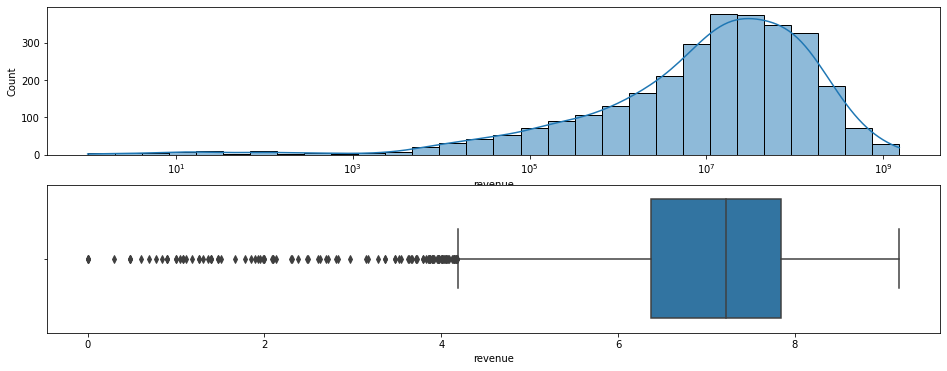

In [95]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=y,ax=ax[0],log_scale=True,bins=30,kde=True)
sns.boxplot(x=np.log10(y),ax=ax[1])

## Budget

distribution of the logarithm of "budget" and outliers


there's some outliers with low budget

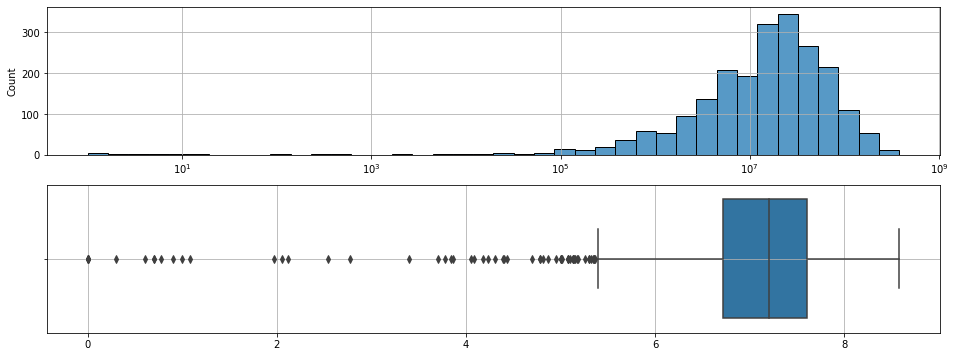

In [96]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["budget"],ax=ax[0],log_scale=True,bins=40)
sns.boxplot(x=np.log10(X["budget"]),ax=ax[1])
ax[0].set(xlabel=None);
ax[0].grid()
ax[1].set(xlabel=None);
ax[1].grid()

relation between budget and the target

looks like linear correlation

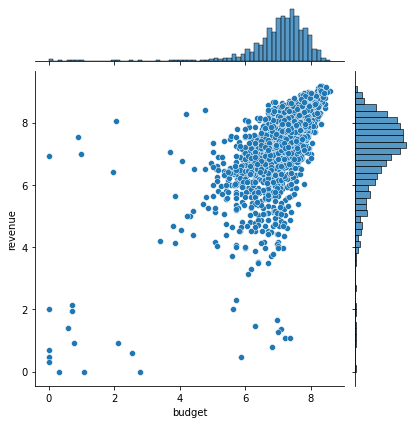

In [97]:
sns.jointplot(x=np.log10(X["budget"]),y=np.log10(y))

## Popularity

distribution of the logarithm of "popularity" and outliers


too many outliers, distribution looks narrow

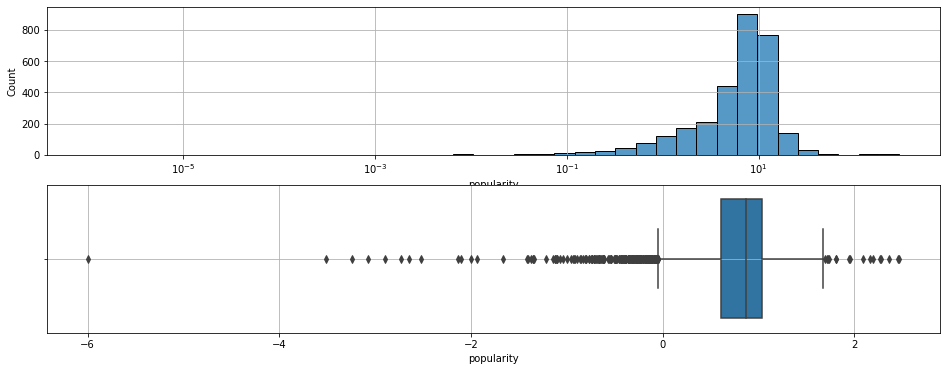

In [98]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["popularity"],ax=ax[0],log_scale=True,bins=40)
sns.boxplot(x=np.log10(X["popularity"]),ax=ax[1],)
ax[0].grid()
ax[1].grid()

relation between popularity and the target

a little correlation

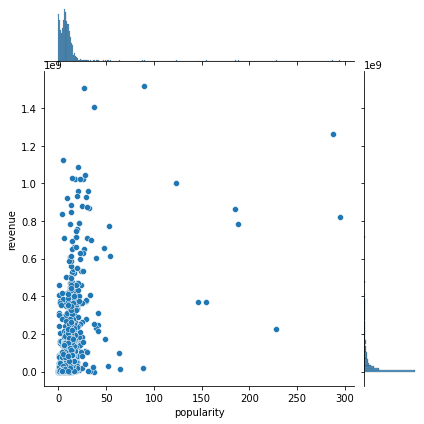

In [99]:
sns.jointplot(x=X["popularity"],y=y)

## Runtime

distribution of "runtime" and outliers




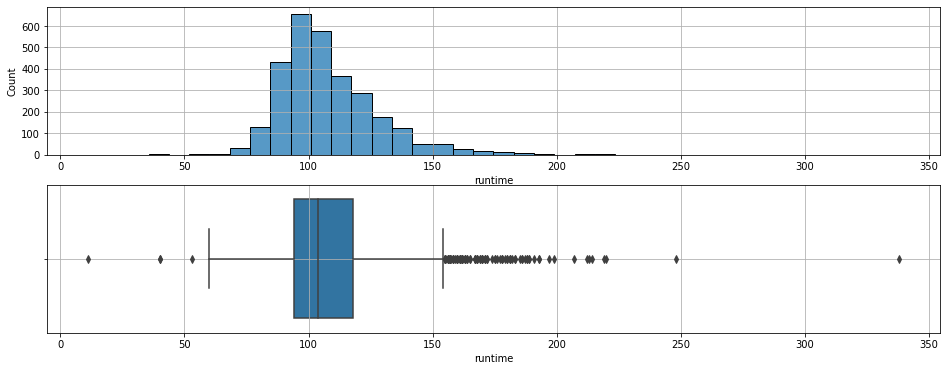

In [100]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(data=X["runtime"],ax=ax[0],bins=40)
sns.boxplot(x=X["runtime"],ax=ax[1],)
ax[0].grid()
ax[1].grid()

relation between runtime and the target

not too correlated

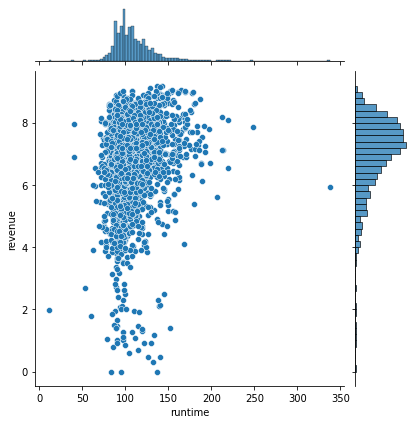

In [101]:
sns.jointplot(x=X["runtime"],y=np.log10(y))

## Differ title

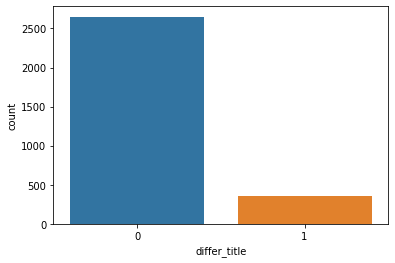

In [102]:
sns.countplot(x=X.differ_title)

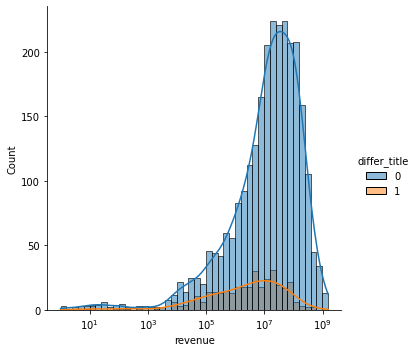

In [103]:
sns.displot(data=Xy, x="revenue",hue="differ_title", log_scale=True,kde=True)

## Has tagline

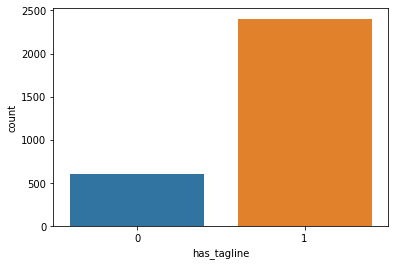

In [104]:
sns.countplot(x=X.has_tagline)

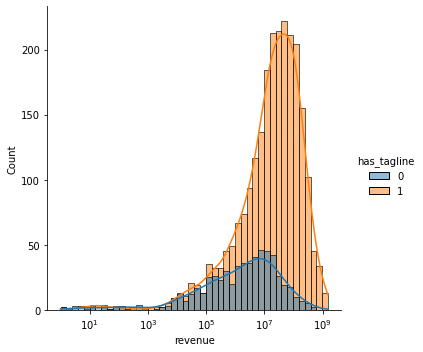

In [105]:
sns.displot(data=Xy, x="revenue",hue="has_tagline", log_scale=True,kde=True)

## Has homepage

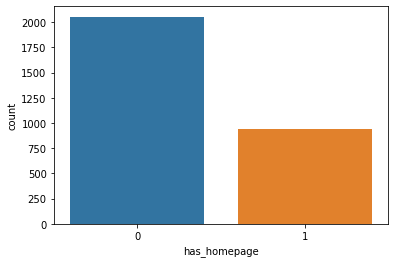

In [106]:
sns.countplot(x=X.has_homepage)

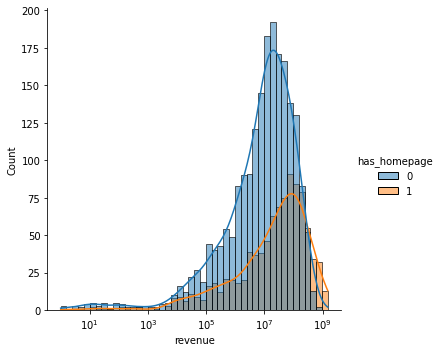

In [107]:
sns.displot(data=Xy, x="revenue",hue="has_homepage", log_scale=True,kde=True)

## Original language

at first we can see that english is the predominant language

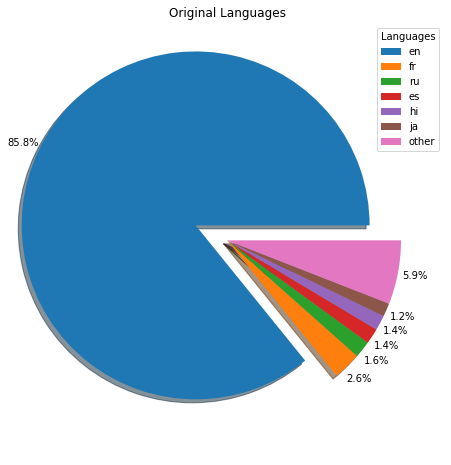

In [108]:
pie=train.original_language.value_counts(normalize=True)

pie_labls=pie.head(6).index.tolist()
pie_labls.append("other")

sizes=pie.head(6).values.tolist()
sizes.append(1-sum(sizes))

explode=[0.2,0,0,0,0,0,0]
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x=sizes, explode=explode, autopct='%1.1f%%',shadow=True,pctdistance=1.1);
ax.legend(pie_labls,title="Languages")
ax.set_title("Original Languages");

the english language have a wide range, but the rest of all has high income, which means that in the dataset movies with other languages are only the most popular

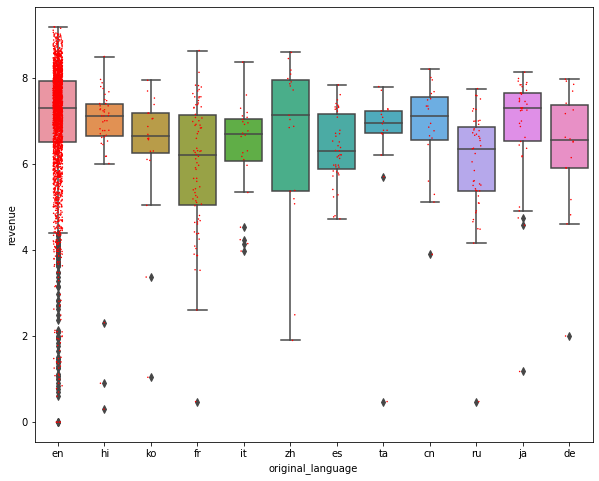

In [109]:
data=pd.concat([train.original_language,np.log10(y)],axis=1)
loc=train.original_language.value_counts().head(12).index
loc=data.original_language.isin(loc)
data=data.loc[loc]

fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(x="original_language",y="revenue",data=data,ax=ax)
sns.stripplot(x="original_language", y="revenue", data=data, color="r", size=1.5,ax=ax)

## Date year

we can see that the number of films per year increase over time

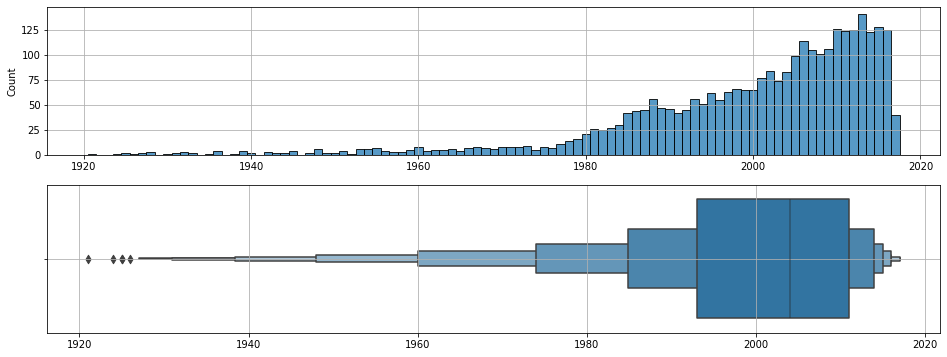

In [110]:
fig, ax = plt.subplots(2,1,figsize = (16, 6))
sns.histplot(x=X["date_year"],ax=ax[0],discrete=True)
ax[0].set(xlabel=None)
sns.boxenplot(x=X["date_year"],ax=ax[1])
ax[1].set(xlabel=None)
ax[0].grid()
ax[1].grid()

as the number of films, revenue increases also over time

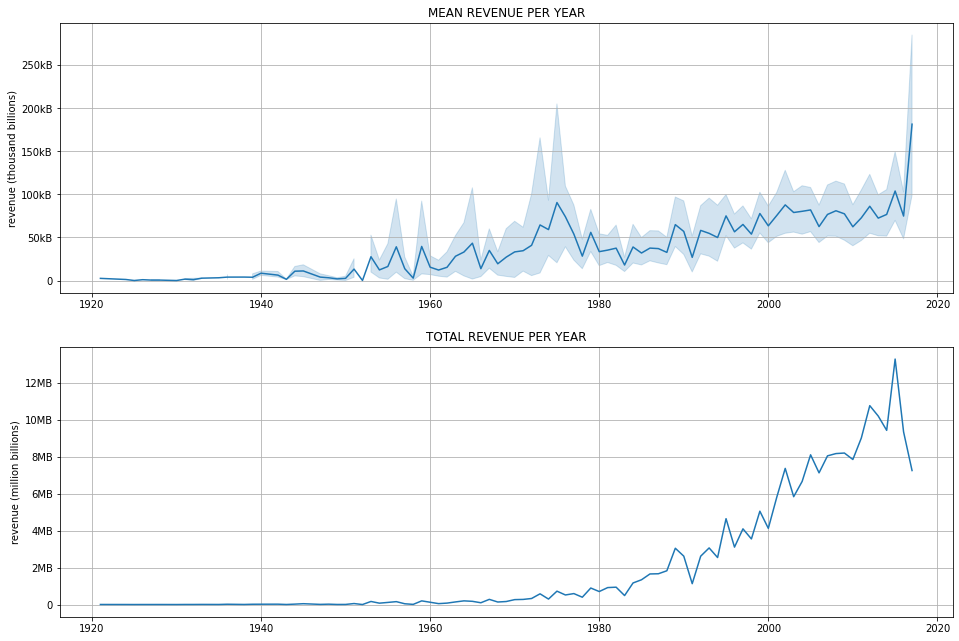

In [111]:
total_r=Xy.groupby("date_year")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.lineplot(x=X.date_year,y=y,ax=ax[0])
ax[0].set_title("MEAN REVENUE PER YEAR")
ax[0].set(xlabel=None,ylabel="revenue (thousand billions)")
ax[0].grid()

sns.lineplot(data=total_r,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER YEAR")
ax[1].set(xlabel=None,ylabel="revenue (million billions)")
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date month

The movies in the dataset have no preference for certain release months, but January, April, and September appear to be the worst despite some outliers.

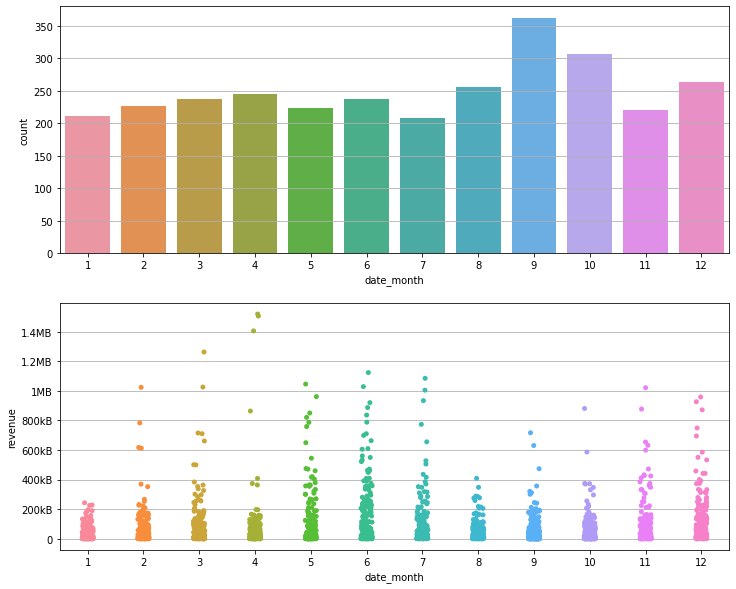

In [112]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))
ax[0].grid()
sns.countplot(x=X["date_month"],ax=ax[0],)
ax[1].grid()
sns.stripplot(x=X["date_month"],y=y,ax=ax[1],)
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

here is a clearly vision of which monts are better than others

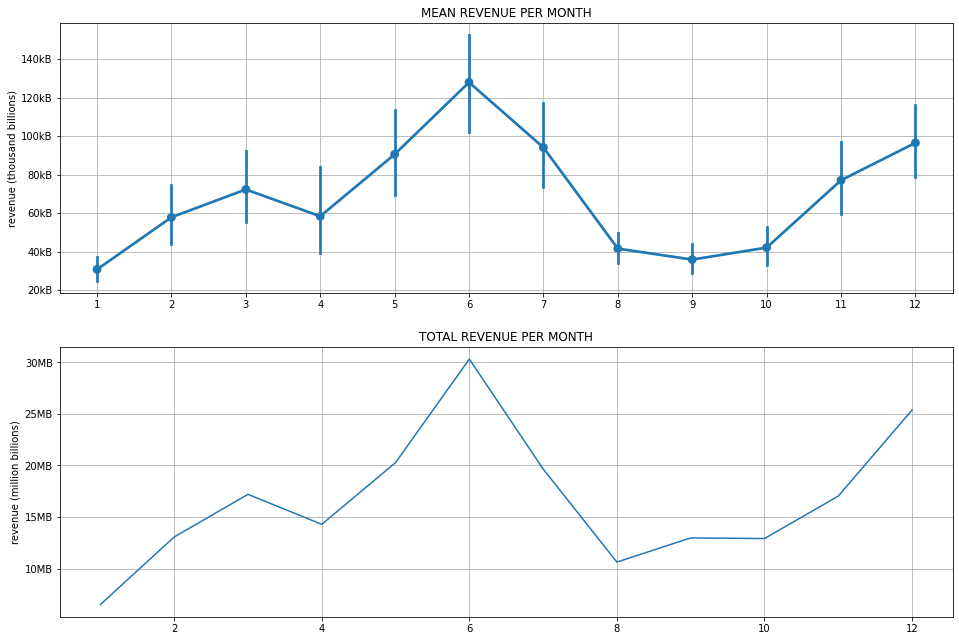

In [113]:
month_total=Xy.groupby("date_month")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_month",y="revenue",ax=ax[0])
ax[0].set_title("MEAN REVENUE PER MONTH")
ax[0].set(xlabel=None,ylabel="revenue (thousand billions)")
ax[0].grid()

sns.lineplot(data=month_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER MONTH")
ax[1].set(xlabel=None,ylabel="revenue (million billions)")
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date day of week

surpresively wednesday is the day with highest  revenue

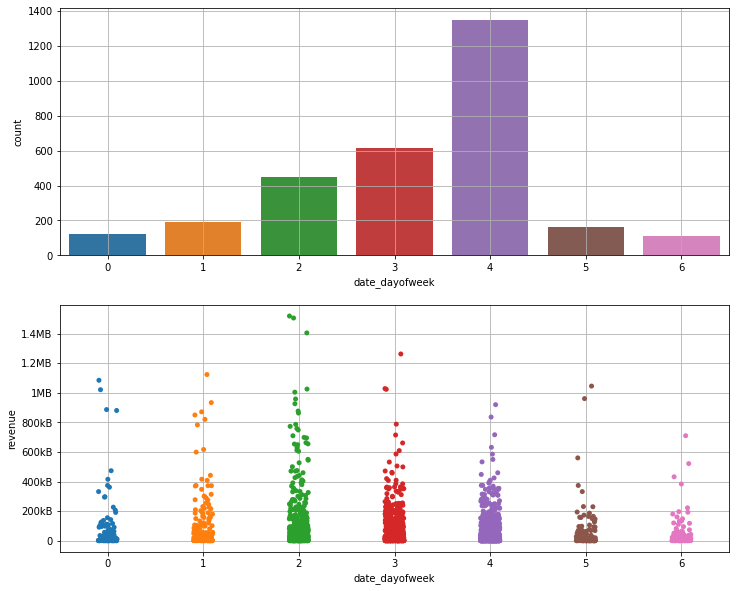

In [114]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["date_dayofweek"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["date_dayofweek"],y=y,ax=ax[1],)
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

It seems like Fridays have more total revenue, but it is because the movies in this dataset are generally released on Fridays and have too many values

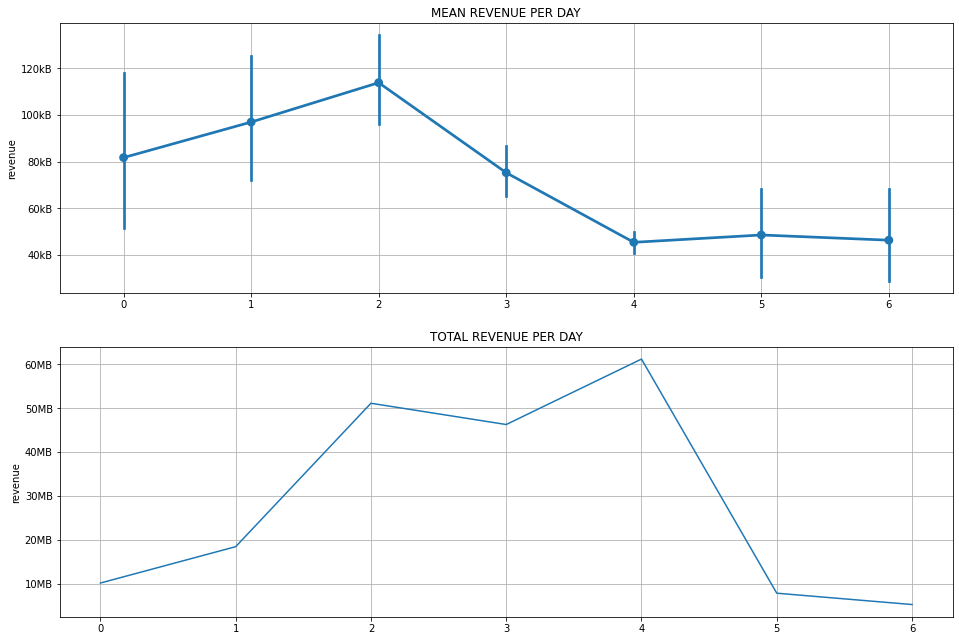

In [115]:
dayw_total=Xy.groupby("date_dayofweek")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_dayofweek",y="revenue",ax=ax[0])
ax[0].set_title("MEAN REVENUE PER DAY")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=dayw_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER DAY")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Date day of month

days of month are evenly distributed except for 1, probably missing dates was filled at the first dat of the month

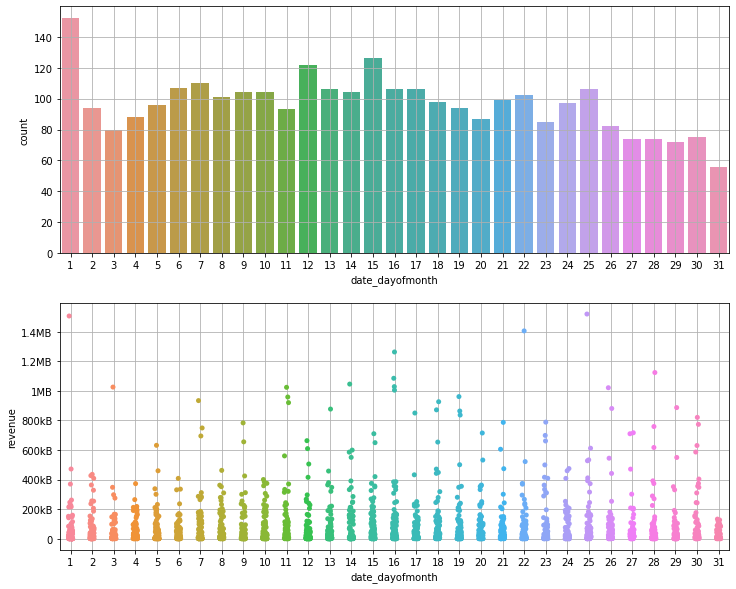

In [116]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["date_dayofmonth"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["date_dayofmonth"],y=y,ax=ax[1],)
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

films released on the mid of the month tend to have more revenue, but ther's no confidence because of variance

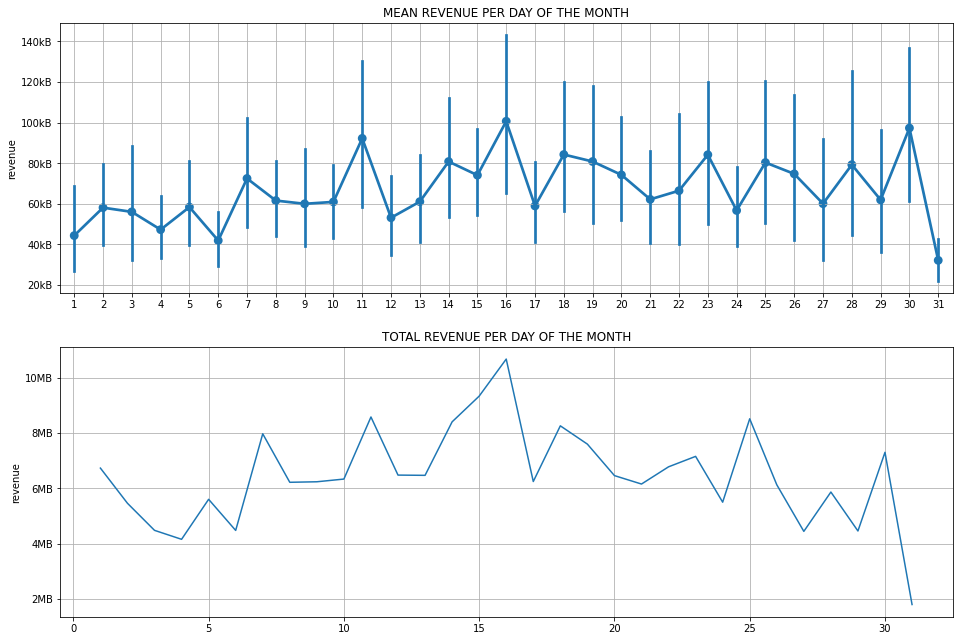

In [117]:
daym_total=Xy.groupby("date_dayofmonth")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="date_dayofmonth",y="revenue",ax=ax[0],)
ax[0].set_title("MEAN REVENUE PER DAY OF THE MONTH")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=daym_total,ax=ax[1])
ax[1].set_title("TOTAL REVENUE PER DAY OF THE MONTH")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

## Has collection

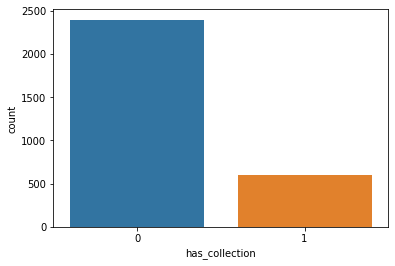

In [118]:
sns.countplot(x=X.has_collection)

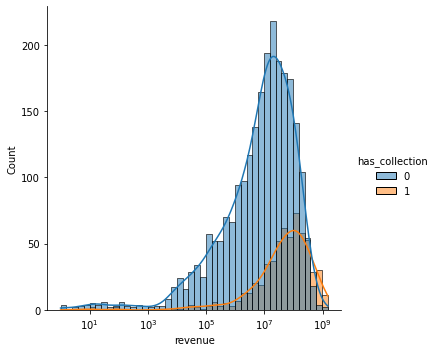

In [119]:
sns.displot(data=Xy, x="revenue",hue="has_collection", log_scale=True,kde=True)

## Number of spoken languages

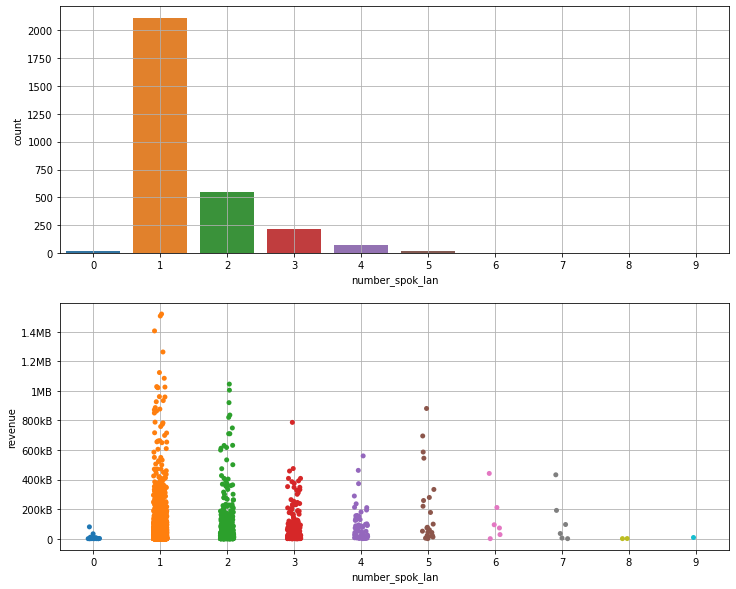

In [120]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X.number_spok_lan,ax=ax[0])
ax[0].grid()

sns.stripplot(data=Xy, y="revenue",x="number_spok_lan",ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));



## Genres


movies with 2,3 or 4 genres tend to have higher revenue, but isn't a big correlation

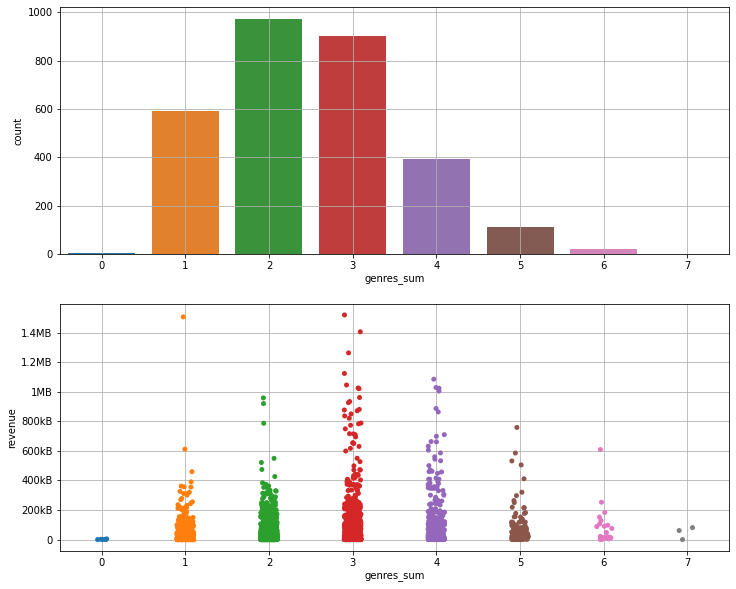

In [121]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["genres_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["genres_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

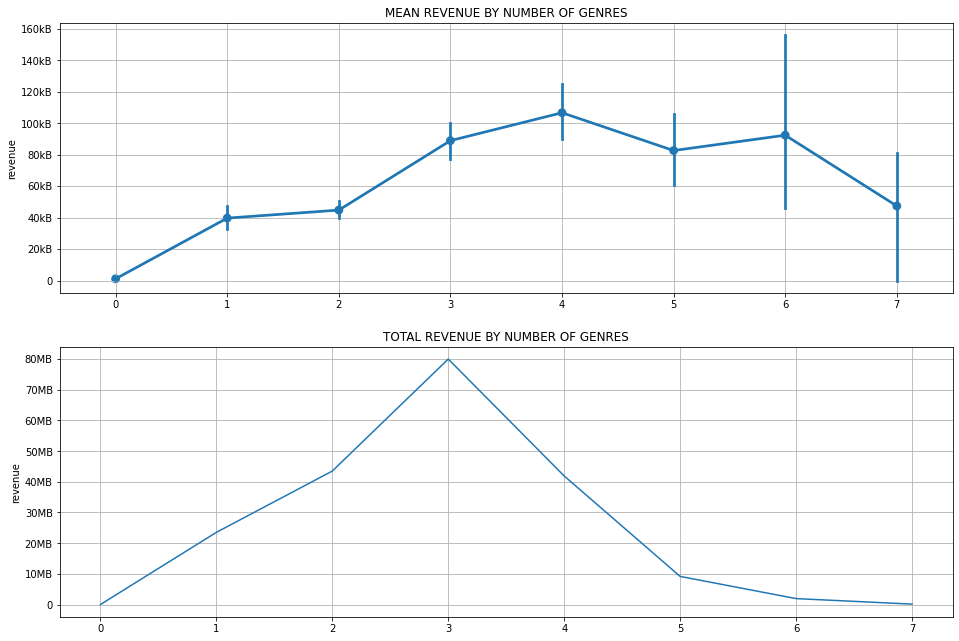

In [122]:
n_gen=Xy.groupby("genres_sum")["revenue"].sum()
fig,ax = plt.subplots(2,1,figsize=(16,6))

sns.pointplot(data=Xy,x="genres_sum",y="revenue",ax=ax[0],)
ax[0].set_title("MEAN REVENUE BY NUMBER OF GENRES")
ax[0].set(xlabel=None)
ax[0].grid()

sns.lineplot(data=n_gen,ax=ax[1])
ax[1].set_title("TOTAL REVENUE BY NUMBER OF GENRES")
ax[1].set(xlabel=None)
ax[1].grid()

plt.subplots_adjust(top=1.5)
ax[0].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

here we can see what are the genres who leaves greatest revenue, animation, fantasy, family, science fiction, adventure and action. 

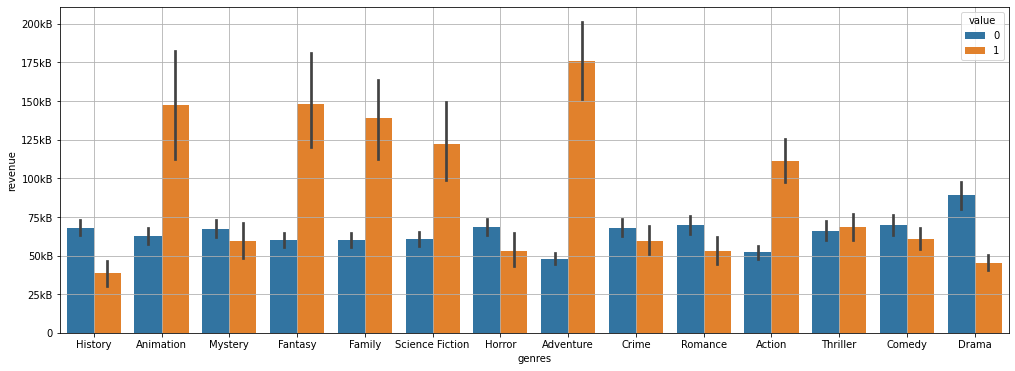

In [123]:
gens=prefix_searcher("genre_",X.columns)
gname=[]
for word in gens:
  gname.append(word.replace("genre_",""))

data=X[gens]
data.columns=gname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="genres")

fig, ax = plt.subplots(figsize=(17,6))
sns.barplot(data=data,x="genres",y="revenue",hue="value",ax=ax)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

## Production companies

usually just 2 companies leaves more revenue, but there's no a clearly correlation

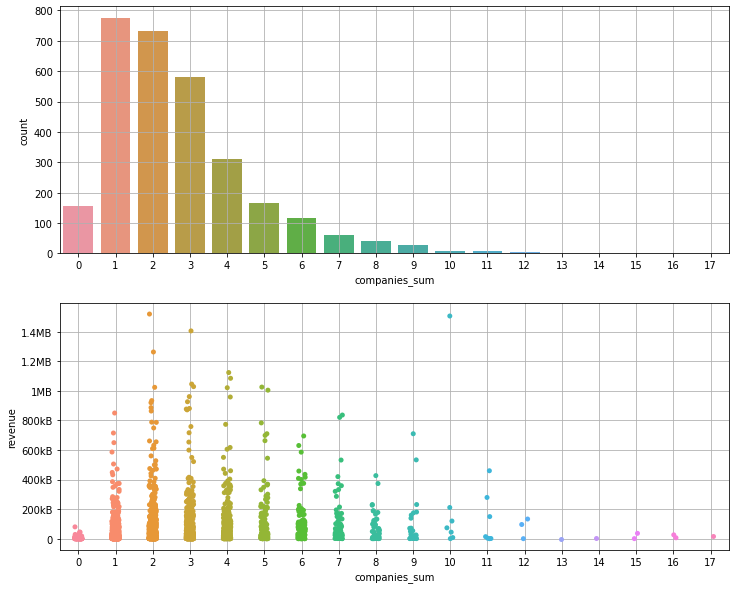

In [124]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["companies_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["companies_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

we can see that movies from Disney differ a lot from the others, with highest revenue

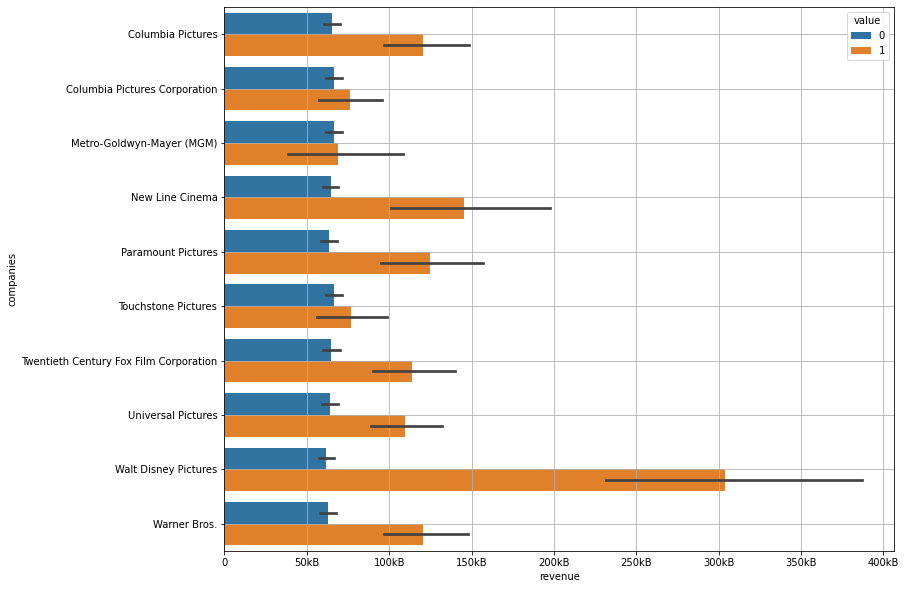

In [125]:
companies=prefix_searcher("comp_",X.columns)
pcompname=[]
for word in companies:
  pcompname.append(word.replace("comp_",""))

data=X[companies]
data.columns=pcompname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="companies")

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=data,y="companies",x="revenue",hue="value")
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

## Production countries

almost all films have  just 1 production country, so its not informative at all

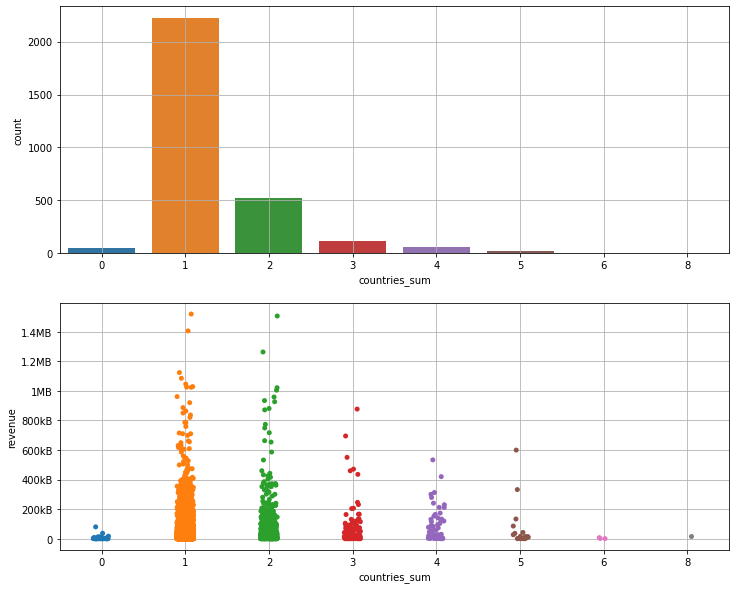

In [126]:
fig, ax = plt.subplots(2,1,figsize = (12, 10))

sns.countplot(x=X["countries_sum"],ax=ax[0],)
ax[0].grid()

sns.stripplot(x=X["countries_sum"],y=y,ax=ax[1])
ax[1].grid()
ax[1].yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

there is too much variation except in the US, which has a clear difference in income when a movie is produced there

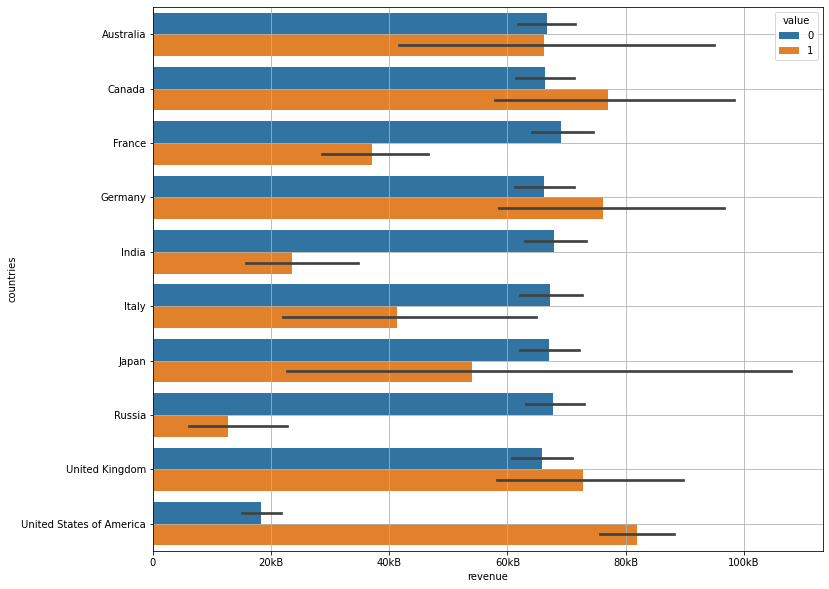

In [127]:
countries=prefix_searcher("country_",X.columns)
pcounname=[]
for word in countries:
  pcounname.append(word.replace("country_",""))

data=X[countries]
data.columns=pcounname
data=pd.concat([data,y],axis=1)
data=pd.melt(data,id_vars="revenue",var_name="countries")

fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(data=data,y="countries",x="revenue",hue="value")
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.grid()

## NLP visualization

In [129]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
# compute the first n number of ngrams sorted by its count
def get_firstn_ngrams(text, stop_words="english",ngram_range=(1,1), n=10):
  from sklearn.feature_extraction.text import CountVectorizer
  vectorizer = CountVectorizer(stop_words = stop_words, ngram_range=ngram_range)
  bow = vectorizer.fit_transform([text])
  count = pd.DataFrame(data=bow.toarray().T, index=vectorizer.get_feature_names(), columns=["Count"])
  first_n = count.sort_values(by="Count", ascending=False)[:n]
  return first_n

### Overview

        Count
life      607
new       417
one       412
young     394
man       361
world     349
love      345
two       335
family    308
story     308


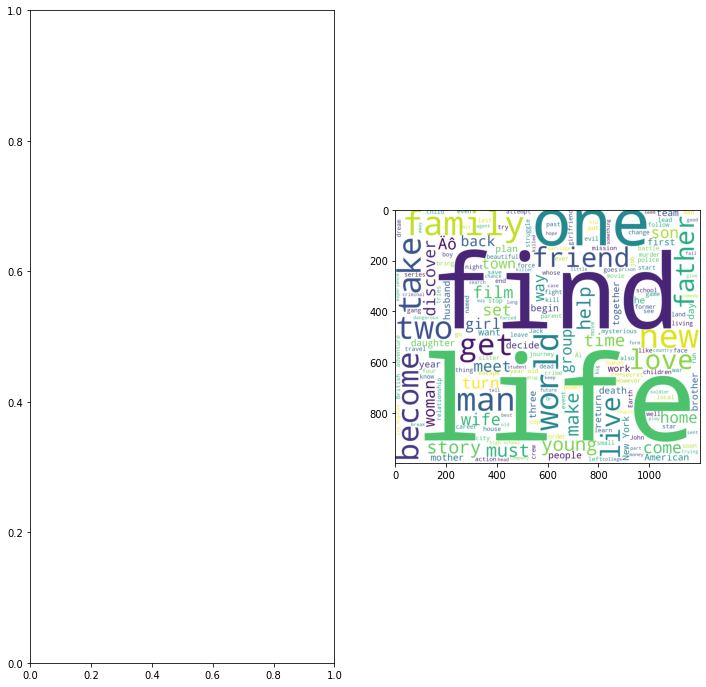

In [148]:
text = " ".join(train.overview.fillna(""))

fig, ax = plt.subplots(1,2,figsize = (12, 12))
wc = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000,stopwords=stopwords).generate(text)
ax[1].imshow(wc);
get_firstn_ngrams(text,stop_words=stopwords)

In [135]:
get_firstn_ngrams(text,ngram_range=(2,2),stop_words=stopwords)

,Count
new york,115
year old,108
high school,65
los angeles,56
falls love,53
small town,45
young man,44
one day,41
world war,41
york city,38


In [136]:
get_firstn_ngrams(text,ngram_range=(3,3),stop_words=stopwords)

,Count
new york city,38
world war ii,24
year old son,12
12 year old,11
based true story,9
year old girl,9
10 year old,8
film tells story,8
13 year old,7
year old boy,7


### Tagline

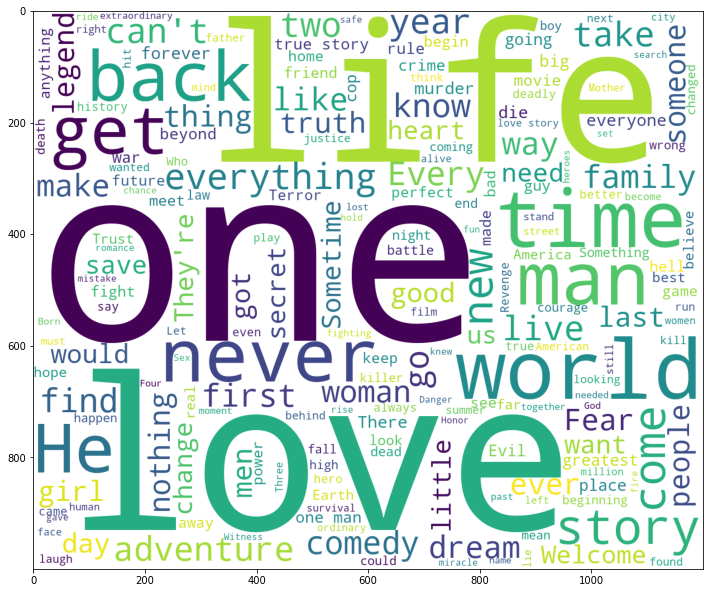

In [137]:
text = " ".join(train.tagline.fillna(""))

fig, ax = plt.subplots(figsize = (12, 12))
wc = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000,stopwords=stopwords).generate(text)
plt.imshow(wc);

In [138]:
get_firstn_ngrams(text,ngram_range=(2,2),stop_words=stopwords)

,Count
one man,23
true story,23
love story,12
motion picture,9
second chance,9
get ready,9
best friends,7
one night,7
life love,7
one woman,7


In [139]:
get_firstn_ngrams(text,ngram_range=(3,3),stop_words=stopwords)

,Count
based true story,4
incredible true story,4
far would go,4
new york city,4
dreams come true,3
beyond imagination love,3
one night stands,3
every legend beginning,2
experience grueling terror,2
whole world laughs,2


### Title

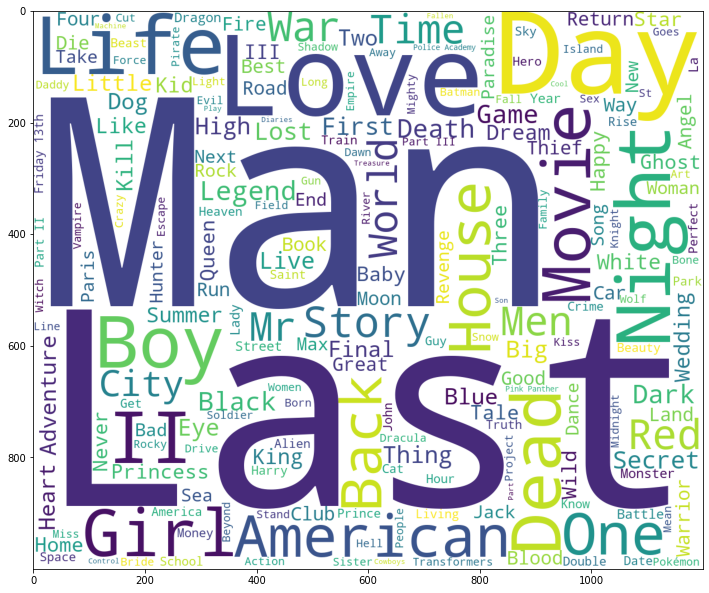

In [142]:
text = " ".join(train.title.fillna(""))

fig, ax = plt.subplots(figsize = (12, 12))
wc = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000,stopwords=stopwords).generate(text)
plt.imshow(wc);

In [143]:
get_firstn_ngrams(text,ngram_range=(2,2),stop_words=stopwords)

,Count
part ii,6
friday 13th,6
police academy,5
part iii,5
pink panther,5
paranormal activity,4
planet apes,4
star trek,4
13th part,4
ice age,4


# **FEATURE ENGINEERING**

## Missing values

now for feature selection gotta use mutual information score

In [ ]:
# function to see the mutual information score for regressions
from sklearn.feature_selection import mutual_info_regression

def mi_scores(X, y, discrete_features="auto"):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

and to evaluate performance i will use cross validation

In [ ]:
# funtion to score the performance of a dataset based on random forest algorithm
# the evaluation metric is Root Mean Squared Logarithmic Error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def RMSLE(y_true,y_pred):
  return np.sqrt(mean_squared_error(y_true,y_pred))

RMSLE_scorer = make_scorer(RMSLE,greater_is_better=False)

def score_dataset(X, y, model=RandomForestRegressor()):
    kf = KFold(n_splits=5, shuffle=True)
    score = cross_val_score( model, X, y, cv=kf, scoring=RMSLE_scorer )
    return print( f"{-score.mean():.4f} ± {score.std():.4f}" )

the remainder NaN values affter transform X are:

In [ ]:
null=X.isna().sum()
null[null>0]

budget     812
runtime     14
dtype: int64

now we are going to look wich is the best imputation for missing values

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

si_mean=SimpleImputer(strategy="mean")
si_median=SimpleImputer(strategy="median")
si_mfre=SimpleImputer(strategy="most_frequent")
knn=KNNImputer()

BUDGET=X[["budget"]].copy()
BUDGET["nan_budget"] = X.budget.isna().astype(int)
BUDGET["budget_fill_0"] = X.budget.fillna(0)
BUDGET["budget_fill_ffill"] = X.budget.fillna(method="ffill")
BUDGET["budget_fill_mean"] = si_mean.fit_transform(X[["budget"]])
BUDGET["budget_fill_median"] = si_median.fit_transform(X[["budget"]])
BUDGET["budget_fill_mfreq"] = si_mfre.fit_transform(X[["budget"]])
BUDGET["budget_fill_knn"] = knn.fit_transform(X[["budget"]])

using mutual information we can see there's no bigger diference, so for missing values i will use the median

In [ ]:
mi_scores(BUDGET.drop("budget",axis=1),y)

budget_fill_median    0.409316
budget_fill_0         0.404745
budget_fill_mfreq     0.402371
budget_fill_mean      0.397042
budget_fill_knn       0.395914
budget_fill_ffill     0.231785
nan_budget            0.113109
Name: MI Scores, dtype: float64

## Feature selection


we can see that only the first two features are strongly correlated, else have 5% or less

In [ ]:
mi_scores(X.fillna(0),np.log1p(y)).head(10)

budget                              0.411562
popularity                          0.256939
companies_sum                       0.061587
country_United States of America    0.051248
original_language                   0.049902
genre_Adventure                     0.049357
runtime                             0.043626
date_year                           0.039965
genres_sum                          0.026173
comp_Universal Pictures             0.024893
Name: MI Scores, dtype: float64

so now I'll do pca to one hot enconded columns to eliminate noise

In [ ]:
# plot pca explained variance ratio with cumulative and individual variance
def plot_evr_pca(df,figsize=(10,7)):
  from sklearn.decomposition import PCA
  pca=PCA(n_components=None)
  df_pca=pca.fit_transform(df)
  component_names = [f"PC{i+1}" for i in range(df_pca.shape[1])]
  y=pca.explained_variance_ratio_
  cumsum_y=np.cumsum(y)
  # figure
  plt.figure(figsize=figsize)
  sns.lineplot(x=component_names,y=y,marker="o")
  sns.lineplot(x=component_names,y=cumsum_y,marker="o")
  plt.legend(["variance","cumulative variance"])
  plt.xlabel("Principal components")
  plt.ylabel("explained variance ratio")
  plt.yticks(np.arange(0,1.1,0.1))
  plt.grid()


In [ ]:
genres=prefix_searcher("genre_",X)
print("list of genres: ",genres)

companies=prefix_searcher("comp_",X)
print("list of companies: ",companies)

countries=prefix_searcher("country_",X)
print("list of countries: ",countries)

list of genres:  ['genre_History', 'genre_Animation', 'genre_Mystery', 'genre_Fantasy', 'genre_Family', 'genre_Science Fiction', 'genre_Horror', 'genre_Adventure', 'genre_Crime', 'genre_Romance', 'genre_Action', 'genre_Thriller', 'genre_Comedy', 'genre_Drama']
list of companies:  ['comp_Columbia Pictures', 'comp_Columbia Pictures Corporation', 'comp_Metro-Goldwyn-Mayer (MGM)', 'comp_New Line Cinema', 'comp_Paramount Pictures', 'comp_Touchstone Pictures', 'comp_Twentieth Century Fox Film Corporation', 'comp_Universal Pictures', 'comp_Walt Disney Pictures', 'comp_Warner Bros.']
list of countries:  ['country_Australia', 'country_Canada', 'country_France', 'country_Germany', 'country_India', 'country_Italy', 'country_Japan', 'country_Russia', 'country_United Kingdom', 'country_United States of America']


I select components just before the "elbow" from the graph

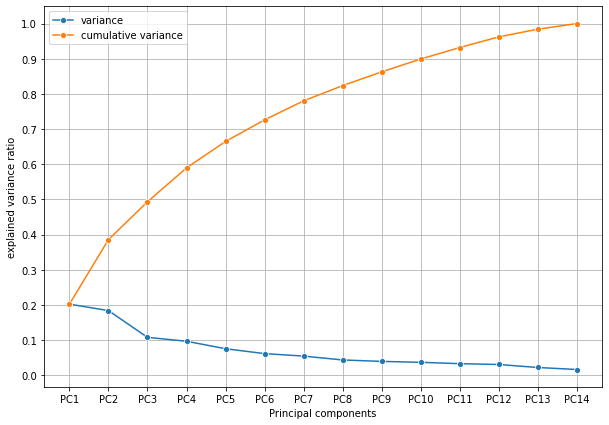

In [ ]:
plot_evr_pca(X[genres])

2 components for genres

In [ ]:
from sklearn.decomposition import PCA
genres_pca=PCA(n_components=2)
pca_transform=genres_pca.fit_transform(X[genres])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC2    0.082491
PC1    0.044609
Name: MI Scores, dtype: float64

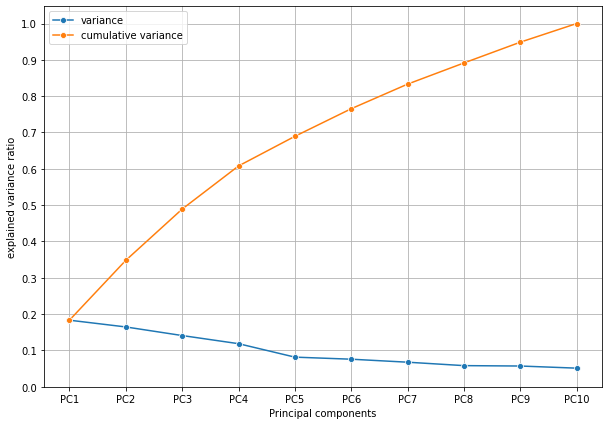

In [ ]:
plot_evr_pca(X[companies])

4 components for companies

In [ ]:
from sklearn.decomposition import PCA
comp_pca=PCA(n_components=4)
pca_transform=comp_pca.fit_transform(X[companies])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC4    0.119350
PC2    0.108616
PC3    0.107284
PC1    0.100040
Name: MI Scores, dtype: float64

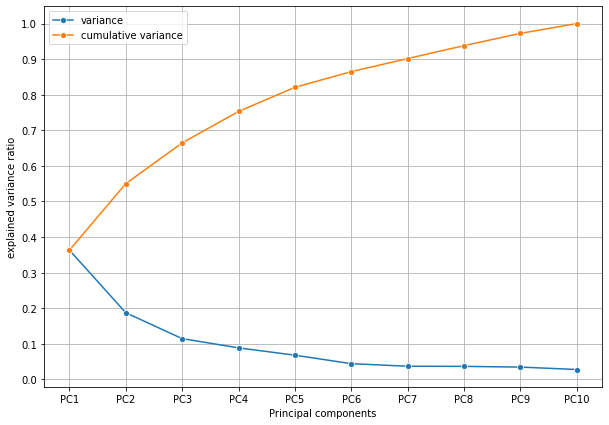

In [ ]:
plot_evr_pca(X[countries])

1 component for countries

In [ ]:
from sklearn.decomposition import PCA
countries_pca=PCA(n_components=1)
pca_transform=countries_pca.fit_transform(X[countries])
component_names = [f"PC{i+1}" for i in range(pca_transform.shape[1])]
pca_transform=pd.DataFrame(pca_transform, columns=component_names)
mi_scores(pca_transform,y)

PC1    0.070642
Name: MI Scores, dtype: float64

select the other features based on tree model feature importances

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)
features=rf.fit(X.fillna(0),np.log1p(y)).feature_importances_
features=pd.DataFrame(features,columns=["tree_based_importance"], index=X.columns)
features.sort_values("tree_based_importance",ascending=False).head(10)

,tree_based_importance
budget,0.391694
popularity,0.168133
date_year,0.094791
runtime,0.064125
date_dayofmonth,0.044460
date_month,0.032084
date_dayofweek,0.022919
companies_sum,0.020286
original_language,0.017215
genres_sum,0.016840


we select the first 5 rows who has almost 5% or more

In [ ]:
features = ["budget", "popularity", "runtime", "date_year",	"date_dayofmonth"] 
pca_names=["GEN_PCA1", "GEN_PCA2"] + ["COMP_PCA1", "COMP_PCA2", "COMP_PCA3", "COMP_PCA4"] + ["COUN_PCA1"] 

make a column tranasformer with feature selection

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
preprocessor = make_column_transformer(( StandardScaler(), features ),
                                       ( PCA(n_components=2), genres ),                              
                                       ( PCA(n_components=4), companies ),
                                       ( PCA(n_components=1), countries ),
                                       )

next we make a pipeline with missing impute, and feature selection, names transformer is to create a dataframe again after imputing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

def remind_names(numpy_matrix,names):
  return pd.DataFrame(numpy_matrix,columns=names)
  
names = FunctionTransformer(lambda x: remind_names(x,names=X.columns))

pipe=Pipeline([( "imputer", SimpleImputer(strategy='median') ),
               ( "remind_names", names ),
               ( "preprocessor", preprocessor )
               ])
pipe=pipe.fit_transform(X)

we can see after feature selection, that the score is better than with all data

In [ ]:
score_dataset(pipe,np.log1p(y))

2.1189 ± 0.1941


In [ ]:
score_dataset(X.fillna(0),np.log1p(y))

2.1716 ± 0.1799


# **MODEL EVALUATION**

In [ ]:
# show a summary dataframe of gridsearchCV results sorted by model's score
def show_results(fitted_grid,header=True):
  results = pd.DataFrame(fitted_grid.cv_results_)
  results = results.set_index("rank_test_score")
  results.mean_test_score = -results.mean_test_score
  results = results[["params","mean_test_score","std_test_score"]]
  if header:
    return results.sort_index().head()
  else:
    return results.sort_index()

In [ ]:
# plot the learing curve of a model
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, scoring=None , ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    _, axes = plt.subplots(1, figsize=(11, 6))
    axes.set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, __, _ = \
        learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

## Linear models

elastic net covers both regularizations, and their combinations

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

enet_params={}
enet_params["alpha"] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
enet_params["l1_ratio"] = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
enet_params["max_iter"] = [1, 5, 10, 100, 1000]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
enet_grid = GridSearchCV(estimator=ElasticNet(random_state=0), param_grid=enet_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1)
enet_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:    4.5s finished


summary of results from all grid search

In [ ]:
results = pd.DataFrame(enet_grid.cv_results_)
results = results.set_index("rank_test_score")
results.mean_test_score = -results.mean_test_score
results = results[["param_l1_ratio","params","mean_test_score","std_test_score"]]

### Ridge regression (L2 regularization)

with l1_ratio=0 we get l2 regularization

In [ ]:
ridge = results[results.param_l1_ratio==0].sort_index()
ridge.head()

,param_l1_ratio,params,mean_test_score,std_test_score
rank_test_score,,,,
79,0,"{'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 100}",2.589905,0.158033
79,0,"{'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 1000}",2.589905,0.158033
81,0,"{'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 10}",2.589905,0.158032
84,0,"{'alpha': 0.001, 'l1_ratio': 0, 'max_iter': 5}",2.589951,0.157911
85,0,"{'alpha': 0.01, 'l1_ratio': 0, 'max_iter': 1000}",2.590022,0.159167


learning curve seems to have underfitting

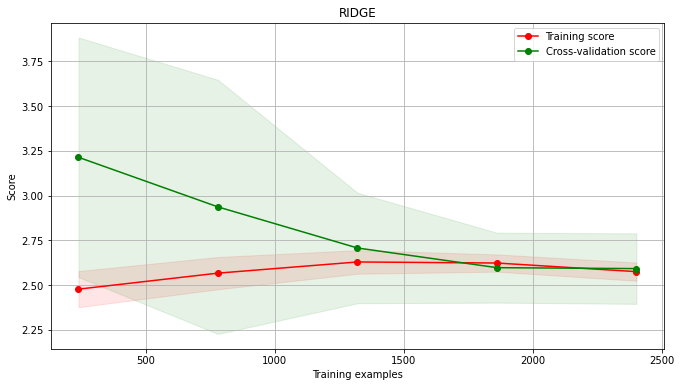

In [ ]:
ridge_model=ElasticNet(alpha=0.001,l1_ratio=0,max_iter=100,tol=1)
plot_learning_curve(estimator=ridge_model, title="RIDGE", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

### Lasso regression (L1 regularization)


with l1_ratio=1 we get l1 regularization

In [ ]:
lasso=results[results.param_l1_ratio==1].sort_index()
lasso.head()

,param_l1_ratio,params,mean_test_score,std_test_score
rank_test_score,,,,
1,1,"{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 100}",2.588778,0.160071
1,1,"{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 10}",2.588778,0.160071
1,1,"{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 1000}",2.588778,0.160071
4,1,"{'alpha': 0.01, 'l1_ratio': 1, 'max_iter': 5}",2.588790,0.159967
36,1,"{'alpha': 0.001, 'l1_ratio': 1, 'max_iter': 10}",2.589730,0.158094


learning curve seems to have underfitting too

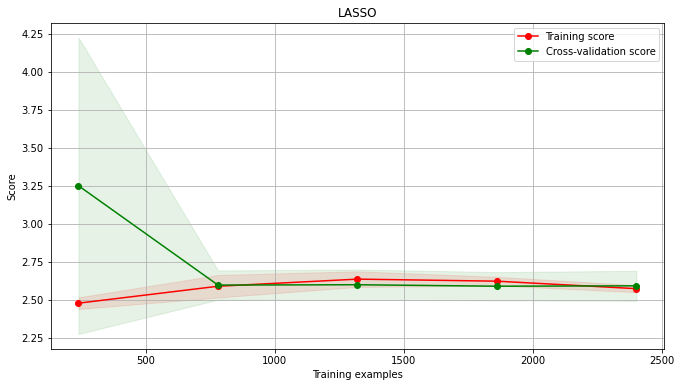

In [ ]:
lasso_model=ElasticNet(alpha=0.01,l1_ratio=1,max_iter=100)
plot_learning_curve(estimator=lasso_model, title="LASSO", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

### Elastic net regression 

best l1_ratio aparently is 0.9

In [ ]:
enet=results[results.param_l1_ratio != 1]
enet=enet[enet.param_l1_ratio != 0]
enet=enet.sort_index()
enet.head()

,param_l1_ratio,params,mean_test_score,std_test_score
rank_test_score,,,,
5,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1...",2.588816,0.159910
5,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 100}",2.588816,0.159910
5,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 10}",2.588816,0.159910
8,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5}",2.588828,0.159807
9,0.8,"{'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 1...",2.588865,0.159759


but the score does not improve at all, our relationship of variables is not necessarily linear, so let's choose a more complex model to avoid underfitting

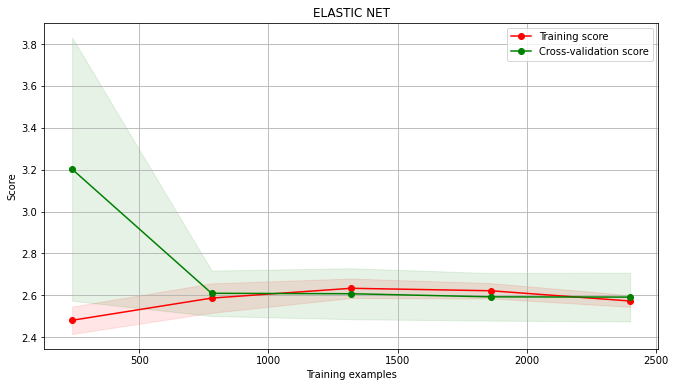

In [ ]:
enet_model=ElasticNet(alpha=0.01,l1_ratio=0.9,max_iter=1000)
plot_learning_curve(estimator=enet_model, title="ELASTIC NET", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## K-nearest neighbors regression 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn_params={}
knn_params["n_neighbors"] = np.arange(1,31)
knn_params["weights"] = ["uniform", "distance"]
knn_params["algorithm"] = ["ball_tree", "kd_tree", "brute"]
knn_params["p"] = [1, 2, 3]
knn_params["metric"] = ["euclidean", "manhattan", "chebyshev", "minkowski", "seuclidean", "mahalanobis"]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
knn_grid = RandomizedSearchCV(n_iter=500, estimator=KNeighborsRegressor(), param_distributions=knn_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1, random_state=0)
knn_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 1570 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.3min finished


the score improve because its a more complex model

In [ ]:
show_results(knn_grid)

,params,mean_test_score,std_test_score
rank_test_score,,,
1,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",2.344163,0.154747
2,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",2.345832,0.156342
3,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",2.346292,0.155060
3,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",2.346292,0.155060
5,"{'weights': 'distance', 'p': 3, 'n_neighbors':...",2.346700,0.154093


but learning curve has too much overfitting, thats for largest value for n_neighbors hyperparameter

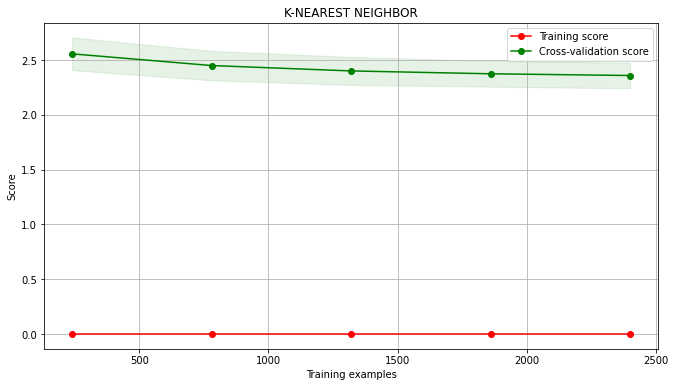

In [ ]:
knn_model=knn_grid.best_estimator_
plot_learning_curve(estimator=knn_model, title="K-NEAREST NEIGHBOR", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Epsilon-support vector regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

svr_params={}
svr_params["kernel"] = ["linear", "rbf", "sigmoid"]
svr_params["gamma"] = [0.0001, 0.001, 0.01, 0.1, 10, "scale", "auto"]
svr_params["C"] = [0.1, 0.5, 1, 10, 50, 100]
svr_params["epsilon"] = [0, 0.01, 0.1, 0.5, 1, 2, 4]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
svr_grid = RandomizedSearchCV(n_iter=200 , estimator=SVR(), param_distributions=svr_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1,random_state=0)
svr_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.2min finished


support vector regression is a bit better than knn

In [ ]:
show_results(svr_grid)

,params,mean_test_score,std_test_score
rank_test_score,,,
1,"{'kernel': 'rbf', 'gamma': 0.1, 'epsilon': 1, ...",2.305084,0.153416
2,"{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': ...",2.323999,0.151943
3,"{'kernel': 'rbf', 'gamma': 'scale', 'epsilon':...",2.328785,0.153075
4,"{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': ...",2.332172,0.153504
5,"{'kernel': 'rbf', 'gamma': 'scale', 'epsilon':...",2.345484,0.153333


learning curve has a correct shape, but deviation is wide in validation

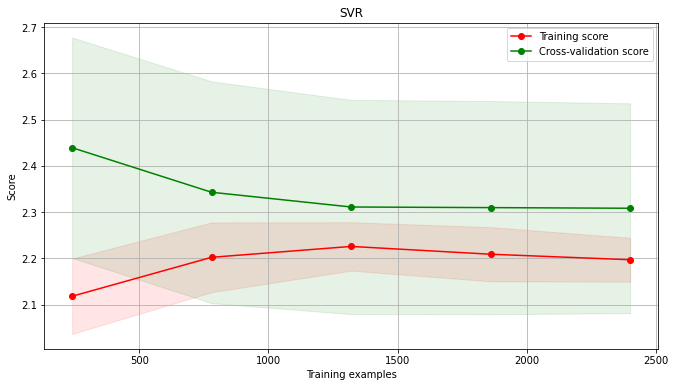

In [ ]:
svr_model=svr_grid.best_estimator_
plot_learning_curve(estimator=svr_model, title="SVR", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Decision tree regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

detree_params={}
detree_params["criterion"] = ["mse", "friedman_mse", "mae", "poisson"]
detree_params["splitter"] = ["best", "random"]
detree_params["max_depth"] = [2, 3, 5, 7, 10, 20, 50, 100, None]
detree_params["min_samples_split"] = [0.005, 0.01, 0.05, 0.1, 0.15, 0.25] #uniform distribution 0.005 to 0.25
detree_params["min_samples_leaf"] = [0.005, 0.01, 0.05, 0.1, 0.15, 0.25] #uniform distribution 0.005 to 0.25
detree_params["max_features"] = ["sqrt", "log2", None, 0.25, 0.5, 0.75] #maybe not usefull for this problem
detree_params["max_leaf_nodes"] = [None, 2, 4, 8, 16, 30, 50]

grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
detree_grid = RandomizedSearchCV(n_iter=20000, estimator=DecisionTreeRegressor(), param_distributions=detree_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1,random_state=1)
detree_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 20000 candidates, totalling 100000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 5868 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12296 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 20696 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 31496 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 44696 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 60296 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 79304 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 99804 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed: 20.7min finished


decision tree its better than our previus models

In [ ]:
show_results(detree_grid)

,params,mean_test_score,std_test_score
rank_test_score,,,
1,"{'splitter': 'best', 'min_samples_split': 0.05...",2.234885,0.124828
2,"{'splitter': 'best', 'min_samples_split': 0.05...",2.238745,0.122679
3,"{'splitter': 'best', 'min_samples_split': 0.05...",2.240294,0.153142
4,"{'splitter': 'best', 'min_samples_split': 0.01...",2.247797,0.121422
5,"{'splitter': 'best', 'min_samples_split': 0.05...",2.248346,0.114023


this is a perfect learning curve, doesn't have overfitting, and underfitting its not quite big, so let's see if random forest improve the score

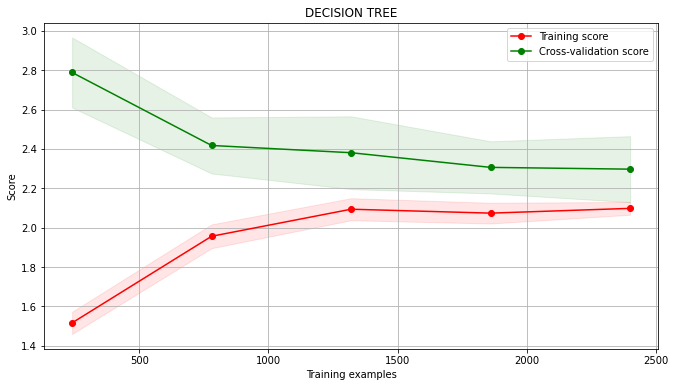

In [ ]:
dt_model=detree_grid.best_estimator_
plot_learning_curve(estimator=dt_model, title="DECISION TREE", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

## Random forest regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_params={}
rf_params["criterion"] = ["mse", "mae"]
rf_params["max_depth"] = [2, 4, 7, 10, None]
rf_params["min_samples_split"] = [0.005, 0.01, 0.05, 0.1, 0.15, 0.25] #uniform distribution 0.005 to 0.25
rf_params["min_samples_leaf"] = [0.005, 0.01, 0.05, 0.1, 0.15, 0.25] #uniform distribution 0.005 to 0.25
rf_params["max_features"] = ["sqrt", "log2", None, 0.25, 0.5, 0.75] 
rf_params["oob_score"] = [True, False]


grid_kf = KFold(n_splits=5, shuffle=True,random_state=1)
rf_grid = RandomizedSearchCV(n_iter=500, estimator=RandomForestRegressor(), param_distributions=rf_params, scoring=RMSLE_scorer, cv=grid_kf, n_jobs=-1,verbose=1,random_state=0)
rf_grid.fit(pipe,np.log1p(y));

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 57.3min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 58.6min finished


as I spected random forest its better than decision tree, so this is the best of all models

In [ ]:
show_results(rf_grid)

,params,mean_test_score,std_test_score
rank_test_score,,,
1,"{'oob_score': False, 'min_samples_split': 0.01...",2.121801,0.140640
2,"{'oob_score': False, 'min_samples_split': 0.01...",2.130950,0.146477
3,"{'oob_score': True, 'min_samples_split': 0.01,...",2.131199,0.147313
4,"{'oob_score': True, 'min_samples_split': 0.005...",2.131615,0.141900
5,"{'oob_score': False, 'min_samples_split': 0.05...",2.164986,0.170147


it's learning curve seems to have some overfitting, but still being the best model

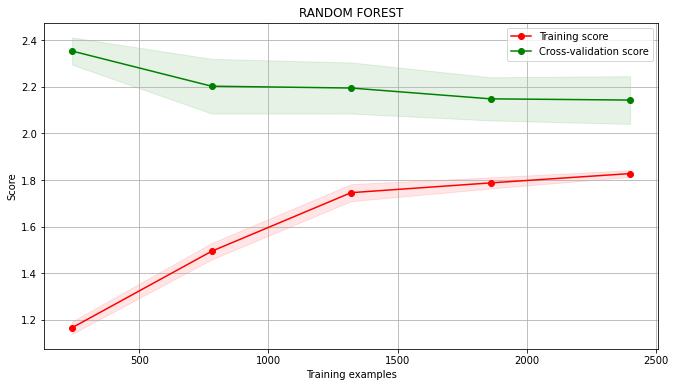

In [ ]:
rf_model=rf_grid.best_estimator_
plot_learning_curve(estimator=rf_model, title="RANDOM FOREST", X=pipe, y=np.log1p(y),cv=KFold(5,shuffle=True),scoring=RMSLE_scorer)

# **FINAL PIPELINE**

finally the entire proccess is resume in a single pipeline, with the best random forest model, and the transform dataset function to extract the information of dictionaries

In [ ]:
final_pipe=Pipeline([( "transform_dataset", FunctionTransformer(transform_dataset) ),  # transform dataset to a readable way
                     ( "imputer", SimpleImputer(strategy='median') ),  # impute missing values with median
                     ( "remind_names", names ),  # recover the column names that lost after impute
                     ( "preprocessor", preprocessor ),  # feature selection and pca 
                     ( "model", rf_model )  # random forest model with best hyperparameters
                    ])

training with the full dataset and making predictions

In [ ]:
final_pipe.fit(train,np.log1p(y))  # train
predict = final_pipe.predict(test) # predict
predict = np.expm1(predict)  #inverse function of log1p to get valid predictions

valid format for submission

In [ ]:
submission=pd.DataFrame(data=predict, index=test.index, columns=["revenue"])
submission.to_csv("submission.csv")
!head submission.csv

id,revenue
3001,1049301.160611893
3002,224299.3153486178
3003,13612276.501564074
3004,3399762.0362052815
3005,750910.9993349494
3006,8979344.219439315
3007,1845449.8382984677
3008,54960437.10413573
3009,21926230.906697564


after submission I obtain a score of 2.10, similar to cross-validation score so the entire process seems to be accurate

In [ ]:
!git clone https://github.com/d0bando/Personal-Projects.git

Cloning into 'Personal-Projects'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


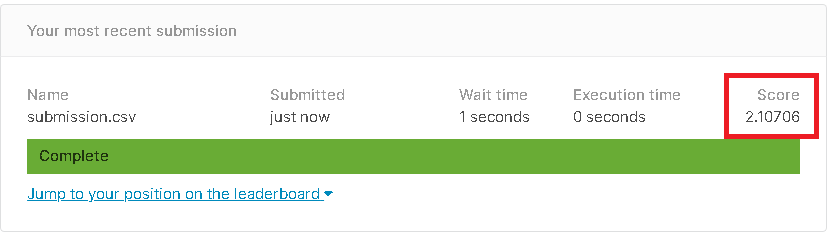

In [ ]:
from IPython.display import Image
Image('/content/Personal-Projects/score.png')